In [6]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math, time, random, datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression,Ridge,Lasso

In [7]:
train=pd.read_csv('Train.csv')
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [8]:
test=pd.read_csv('Test.csv')
test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [9]:
sample_submission=pd.read_csv('Sample Submission.csv')
sample_submission.head()

,UnitPrice
0,100
1,100
2,100
3,100
4,100


In [10]:
len(train)

284780

In [11]:
train.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


In [13]:
train.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

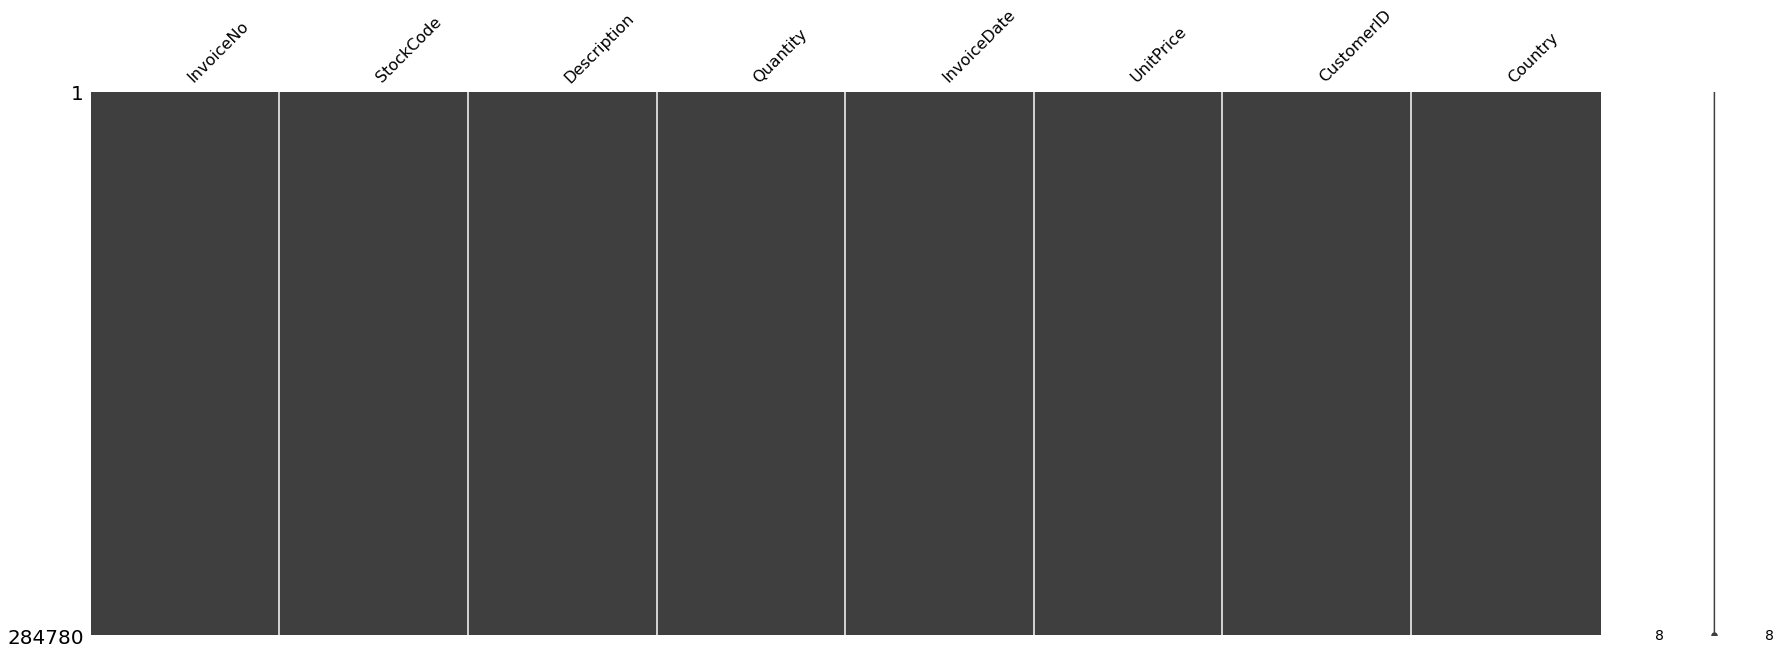

In [14]:
missingno.matrix(train, figsize = (30,10))

In [15]:
train.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
train.dtypes

InvoiceNo        int64
StockCode        int64
Description      int64
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country          int64
dtype: object

In [17]:
train.shape

(284780, 8)

In [18]:
corr=train.corr()
corr

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceNo,1.000000,0.086809,0.024804,-0.008363,0.007927,-0.007463,0.005432
StockCode,0.086809,1.000000,-0.013230,-0.000942,0.020073,0.002887,0.006242
Description,0.024804,-0.013230,1.000000,0.000194,-0.000424,-0.005227,-0.014791
Quantity,-0.008363,-0.000942,0.000194,1.000000,-0.000924,-0.002930,-0.008001
UnitPrice,0.007927,0.020073,-0.000424,-0.000924,1.000000,-0.004932,-0.005378
CustomerID,-0.007463,0.002887,-0.005227,-0.002930,-0.004932,1.000000,0.388198
Country,0.005432,0.006242,-0.014791,-0.008001,-0.005378,0.388198,1.000000


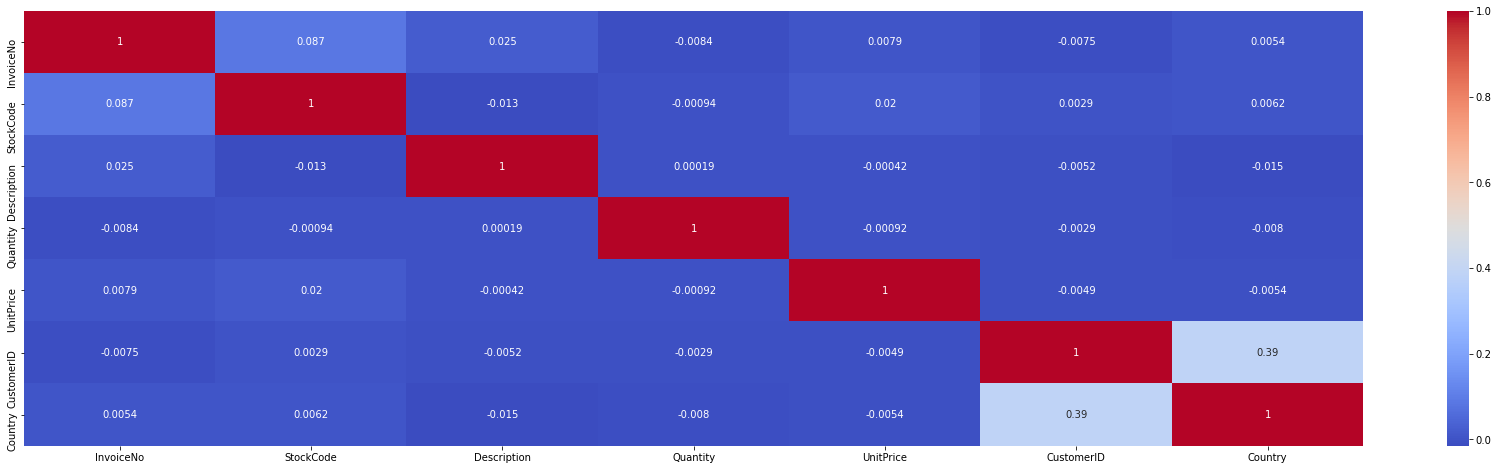

In [19]:
plt.figure(figsize=(30,8))
sns.heatmap(train.corr(),cmap='coolwarm',annot = True)
plt.show()

In [20]:
train['InvoiceDate'] = pd.to_datetime(train['InvoiceDate'], errors='coerce')
test['InvoiceDate'] = pd.to_datetime(test['InvoiceDate'], errors='coerce')

print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    284780 non-null  int64         
 1   StockCode    284780 non-null  int64         
 2   Description  284780 non-null  int64         
 3   Quantity     284780 non-null  int64         
 4   InvoiceDate  284780 non-null  datetime64[ns]
 5   UnitPrice    284780 non-null  float64       
 6   CustomerID   284780 non-null  float64       
 7   Country      284780 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 17.4 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    122049 non-null  int64         
 1   StockCode    122049 non-null  int64         
 2   

In [21]:
monthMap = {1:'01',2:'02',3:'03',4:'04',5:'05',6:'06',7:'07',8:'08',9:'09',10:'10',11:'11',12:'12'}

# Extracting Month and Year from Date columns
train['Year'] = pd.DatetimeIndex(train['InvoiceDate']).year
train['Month'] = pd.DatetimeIndex(train['InvoiceDate']).month
#df.Month.apply(lambda x: datetime.strptime(str(x), '%m').strftime('%b'))
#train_df['MonthName'] = train_df.Month.apply(lambda x: datetime.datetime.strptime(str(x), '%m').strftime('%b'))
train['YearMonth'] = train["Year"].astype(str) + train["Month"].map(monthMap)
train['YearMonth'] = train['YearMonth'].apply(lambda x: int(x))

In [22]:
def ValueCounts(df, feature, normalize=False, Sorted=False):
    x = df[feature].value_counts(normalize=normalize).rename_axis(feature).reset_index(name='counts')
    plt.figure(figsize=(15,10))
    if Sorted:
        sns.barplot(x = feature, y = 'counts', data = x.loc[:25] , order=x.loc[:25].sort_values('counts', ascending=False)[feature])
    else:
        sns.barplot(x = feature, y = 'counts', data = x.loc[:25])
    plt.show()

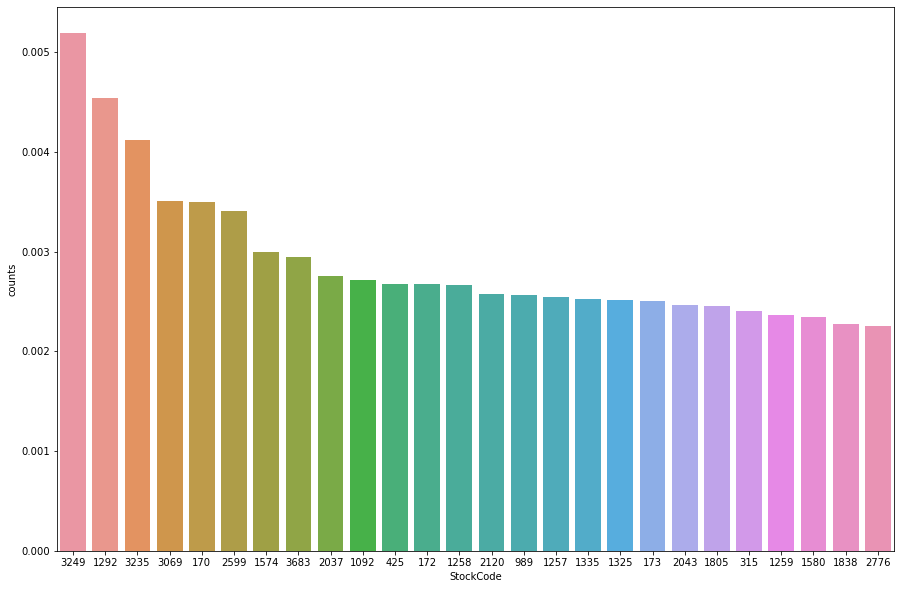

In [23]:
#Visualizing based on StockCode
ValueCounts(train, 'StockCode',normalize=True,Sorted=True)

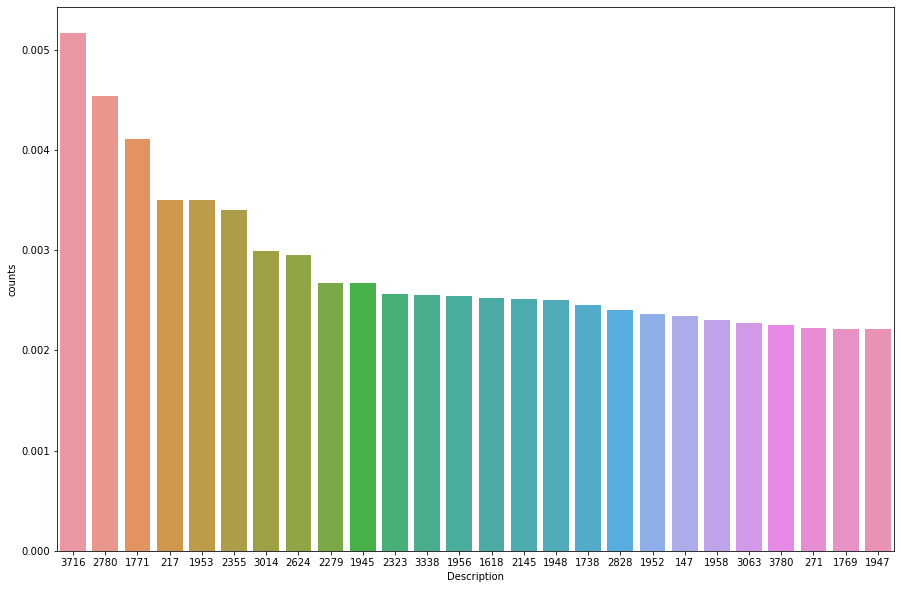

In [24]:
#Visualizing counts based on Description
ValueCounts(train, 'Description',normalize=True, Sorted=True)

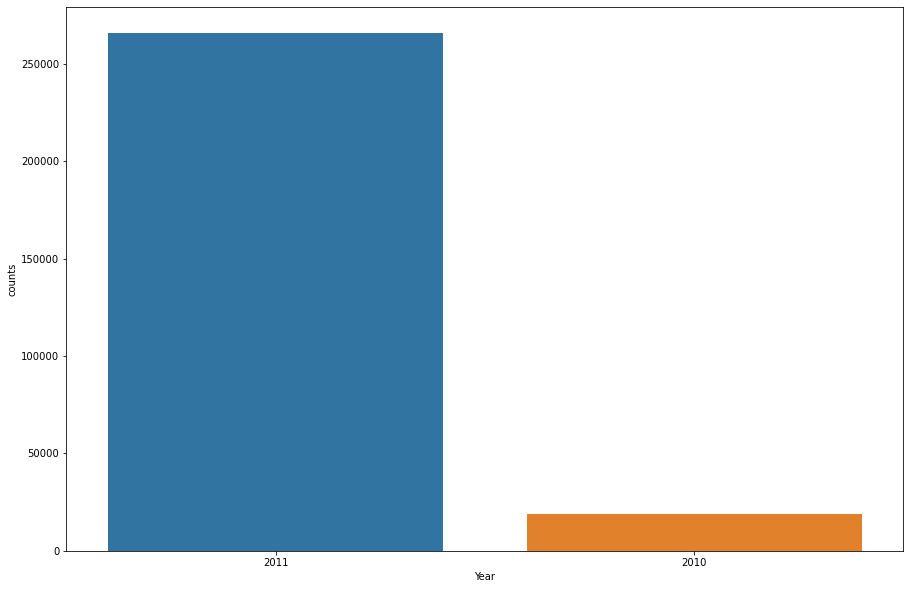

In [25]:
#Visualizing Counts based on Year
ValueCounts(train, 'Year', Sorted=True)

Major activities took place in the year 2011

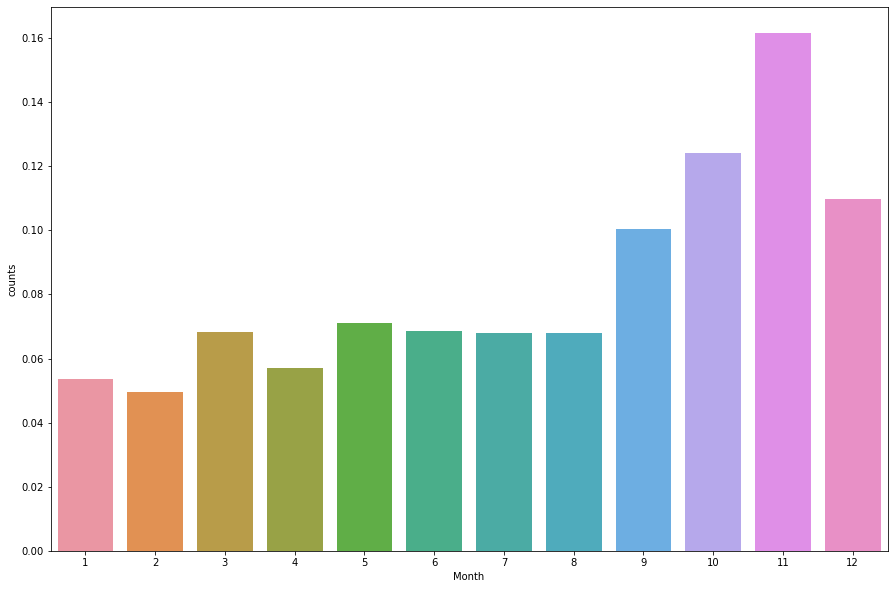

In [26]:
#Visualizing Counts based on Month
ValueCounts(train, 'Month',normalize=True, Sorted=False)

->We can say that 9th,10th,11th and 12th month witnessed the largest sales while the First 2 months witnessed low sales

->While the remaining months witnessed a stable sales growth month on month


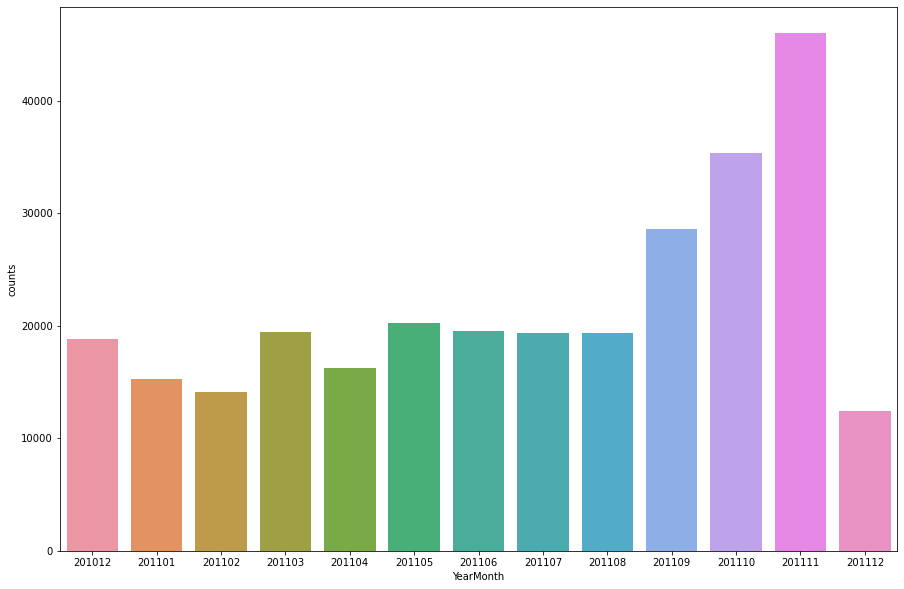

In [27]:
#Visualizing Counts based on year/Month
ValueCounts(train, 'YearMonth')

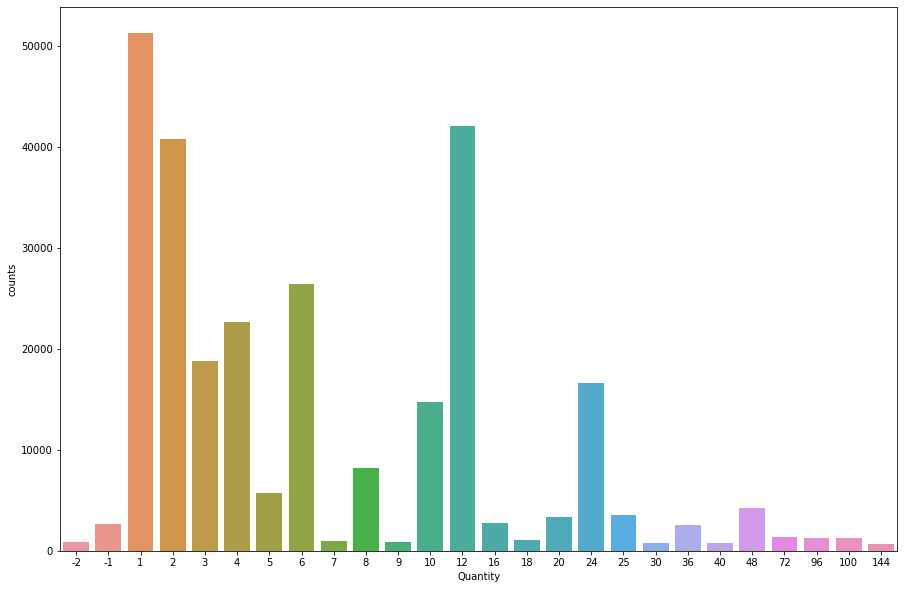

In [28]:
#Visualizing Counts based on Quantity Sold
ValueCounts(train, 'Quantity')

->We can see that there are some negative quantites sold. We would futher find in detail more about these quantities


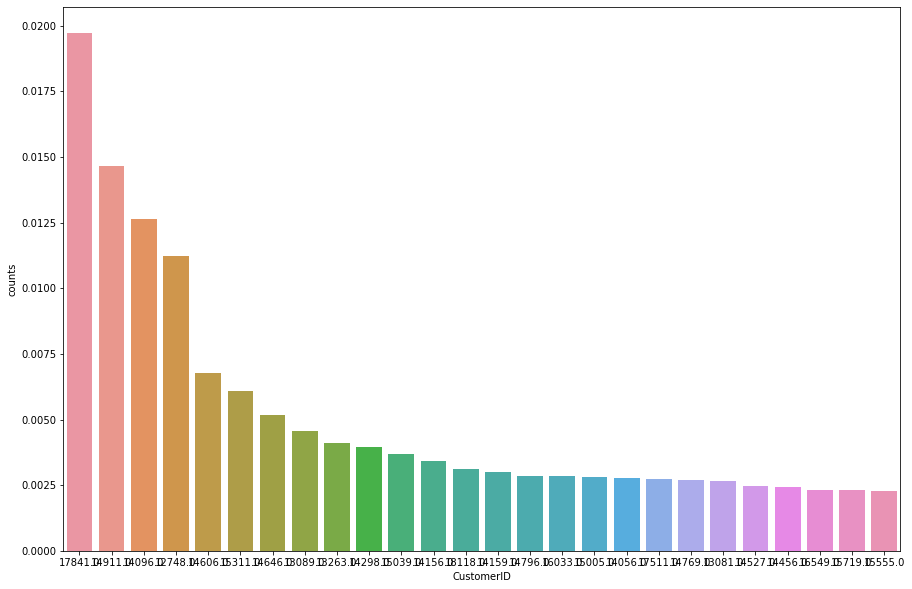

In [29]:
#Visualizing Counts based on Customer
ValueCounts(train, 'CustomerID',normalize=True,Sorted=True)

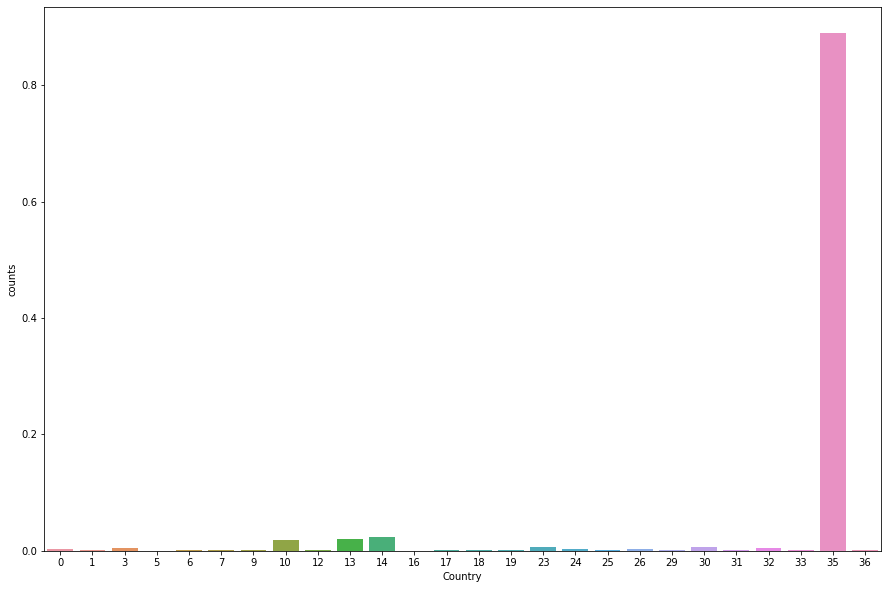

In [30]:
#Visualizing Counts based on Country
ValueCounts(train, 'Country',normalize=True)

Country with 1D 13 has the highest number of quantities sold

While other countries with ID 10,13,14 witnessed very few sales

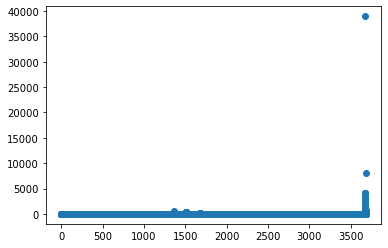

In [31]:
plt.scatter(train.StockCode, train.UnitPrice)
plt.show()

In [32]:
x = train.loc[train.UnitPrice >= 1000]
x.StockCode.unique()

array([3680, 3681, 3679, 3678, 3683])

In [33]:
#Checking for these values in test dataset 
y = test.loc[test.StockCode.isin(x.StockCode.unique())]
y.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
362,3711,3681,2140,1,2011-03-09 09:50:00,12924.0,35
640,2524,3683,2624,3,2011-02-03 13:30:00,12464.0,3
679,7846,3683,2624,1,2011-06-09 13:09:00,12399.0,3
1345,12623,3683,2624,1,2011-09-22 16:58:00,12437.0,13
1601,16500,3683,2624,1,2011-11-17 09:34:00,12610.0,18


In [34]:
x = train.loc[train.StockCode.isin(x.StockCode.unique())]
x.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,YearMonth
258,2087,3683,2624,2,2011-01-24 12:58:00,18.0,12693.0,14,2011,1,201101
474,9788,3683,2624,1,2011-07-24 13:18:00,2.9,17935.0,35,2011,7,201107
543,1658,3683,2624,5,2011-01-11 07:57:00,18.0,12736.0,13,2011,1,201101
910,15581,3683,2624,5,2011-11-07 12:27:00,15.0,12408.0,3,2011,11,201111
1380,6811,3683,2624,4,2011-05-19 08:26:00,18.0,12481.0,14,2011,5,201105


In [35]:
xGroupBy = x.groupby(["StockCode","Country"]).agg({'UnitPrice':np.median}).reset_index()
xGroupBy.head()

,StockCode,Country,UnitPrice
0,3678,35,464.715
1,3679,10,434.510
2,3679,35,27.215
3,3680,35,715.850
4,3681,6,293.000


In [36]:
#updating Train_df outliers with median data 
#train_df = train_df.join(xGroupBy, on=["StockCode","Country"], how='left',rsuffix='_temp')
train = pd.merge(train, xGroupBy, on=["StockCode","Country"], how='left')

In [37]:
train.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_x,CustomerID,Country,Year,Month,YearMonth,UnitPrice_y
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,2011,5,201105,NaN
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,2011,5,201105,NaN
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,2011,11,201111,NaN
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,2011,11,201111,NaN
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,2011,5,201105,NaN


In [38]:
def myfunc(x,y):
    if x >= 1000:
        return y
    else:
        return x

In [39]:
train['UnitPrice'] = train.apply(lambda x: myfunc(x.UnitPrice_x, x.UnitPrice_y), axis=1)

In [40]:
train.loc[train.UnitPrice_x>=1000].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_x,CustomerID,Country,Year,Month,YearMonth,UnitPrice_y,UnitPrice
8863,16242,3680,1043,1,2011-11-14 15:27:00,1500.36,14096.0,35,2011,11,201111,715.850,715.850
11961,14292,3681,2140,1,2011-10-19 11:18:00,2118.74,12744.0,29,2011,10,201110,1685.845,1685.845
51127,14824,3681,2140,1,2011-10-27 14:13:00,4161.06,12536.0,13,2011,10,201110,575.650,575.650
52322,17128,3680,1043,1,2011-11-23 13:39:00,1270.06,14096.0,35,2011,11,201111,715.850,715.850
58879,4823,3681,2140,1,2011-04-04 13:03:00,2382.92,12744.0,29,2011,4,201104,1685.845,1685.845
60351,3816,3681,2140,1,2011-03-11 10:22:00,1687.17,14911.0,10,2011,3,201103,1687.170,1687.170
65239,19659,3679,1066,-1,2011-04-08 14:17:00,1867.86,17940.0,35,2011,4,201104,27.215,27.215
71290,3815,3681,2140,1,2011-03-11 10:19:00,1687.17,14911.0,10,2011,3,201103,1687.170,1687.170
103356,19618,3681,2140,-1,2011-04-04 13:08:00,2382.92,12744.0,29,2011,4,201104,1685.845,1685.845
110272,19618,3681,2140,-1,2011-04-04 13:08:00,1252.95,12744.0,29,2011,4,201104,1685.845,1685.845


In [41]:
train[train['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice_x,CustomerID,Country,Year,Month,YearMonth,UnitPrice_y,UnitPrice
20,20652,3131,1576,-36,2011-07-26 10:15:00,1.06,12431.0,0,2011,7,201107,NaN,1.06
152,22083,2224,11,-1,2011-12-01 10:41:00,4.95,15993.0,35,2011,12,201112,NaN,4.95
157,19796,1521,2679,-6,2011-04-26 11:19:00,2.95,12705.0,14,2011,4,201104,NaN,2.95
186,21750,2166,1760,-100,2011-11-09 11:41:00,1.79,17511.0,35,2011,11,201111,NaN,1.79
196,21369,1014,2934,-17,2011-10-06 20:08:00,4.25,16839.0,35,2011,10,201110,NaN,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284550,21879,2145,3746,-1,2011-11-18 09:44:00,2.10,17034.0,35,2011,11,201111,NaN,2.10
284650,21519,2294,1563,-1,2011-10-20 19:15:00,1.25,17169.0,35,2011,10,201110,NaN,1.25
284727,22148,2334,3664,-6,2011-12-06 14:57:00,3.75,15622.0,35,2011,12,201112,NaN,3.75
284740,20867,2658,826,-1,2011-08-22 15:00:00,3.25,16184.0,35,2011,8,201108,NaN,3.25


In [42]:
test[test['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
36,20489,1102,3768,-12,2011-07-07 17:22:00,18072.0,35
104,19675,3207,1325,-1,2011-04-11 13:43:00,13668.0,35
125,20177,515,1940,-2,2011-06-05 12:01:00,15722.0,35
175,19710,1739,3109,-1,2011-04-14 10:49:00,12982.0,35
238,21020,1650,197,-1,2011-09-09 12:52:00,16173.0,35
...,...,...,...,...,...,...,...
121786,20390,1621,1177,-2,2011-06-26 15:47:00,17731.0,35
121790,21022,2079,3025,-1,2011-09-09 12:55:00,14210.0,35
121795,20197,1923,2669,-5,2011-06-07 14:29:00,15189.0,35
121912,19643,1805,1738,-1,2011-04-06 17:16:00,17438.0,35


->There are negative values of Quantity in both the datasets,We will not drop the columns unless and until we have a strong conclusion for it

->As of now we proceed with these datas for further process

In [43]:
#We drop unwanted features from our dataset
train = train.drop(columns=["Description", "UnitPrice_x","UnitPrice_y","CustomerID", "InvoiceNo", "InvoiceDate",'Year','Month'], axis = 1)


In [44]:
train.head()

,StockCode,Quantity,Country,YearMonth,UnitPrice
0,1583,3,35,201105,3.75
1,1300,6,35,201105,1.95
2,2178,4,35,201111,5.95
3,2115,1,35,201111,0.83
4,1210,12,35,201105,1.65


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284780 entries, 0 to 284779
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   StockCode  284780 non-null  int64  
 1   Quantity   284780 non-null  int64  
 2   Country    284780 non-null  int64  
 3   YearMonth  284780 non-null  int64  
 4   UnitPrice  284780 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 13.0 MB


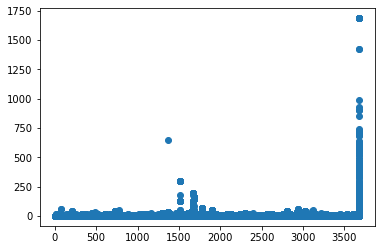

In [46]:
plt.scatter(train.StockCode, train.UnitPrice)
plt.show()

In [47]:
train.loc[(train['StockCode']> 2000) & (train['UnitPrice']>=1500)]


,StockCode,Quantity,Country,YearMonth,UnitPrice
11961,3681,1,29,201110,1685.845
58879,3681,1,29,201104,1685.845
60351,3681,1,10,201103,1687.170
71290,3681,1,10,201103,1687.170
103356,3681,-1,29,201104,1685.845
110272,3681,-1,29,201104,1685.845
111657,3681,1,29,201104,1685.845
155565,3681,-1,29,201110,1685.845
207110,3681,-1,29,201110,1685.845


In [48]:
monthMap = {1:'01',2:'02',3:'03',4:'04',5:'05',6:'06',7:'07',8:'08',9:'09',10:'10',11:'11',12:'12'}

# Extracting Month and Year from Date columns
test['Year'] = pd.DatetimeIndex(test['InvoiceDate']).year
test['Month'] = pd.DatetimeIndex(test['InvoiceDate']).month
test['YearMonth'] = test["Year"].astype(str) + test["Month"].map(monthMap)
test['YearMonth'] = test['YearMonth'].apply(lambda x: int(x))

In [49]:
test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,Year,Month,YearMonth
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35,2011,2,201102
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35,2010,12,201012
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35,2011,10,201110
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35,2011,6,201106
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35,2011,11,201111


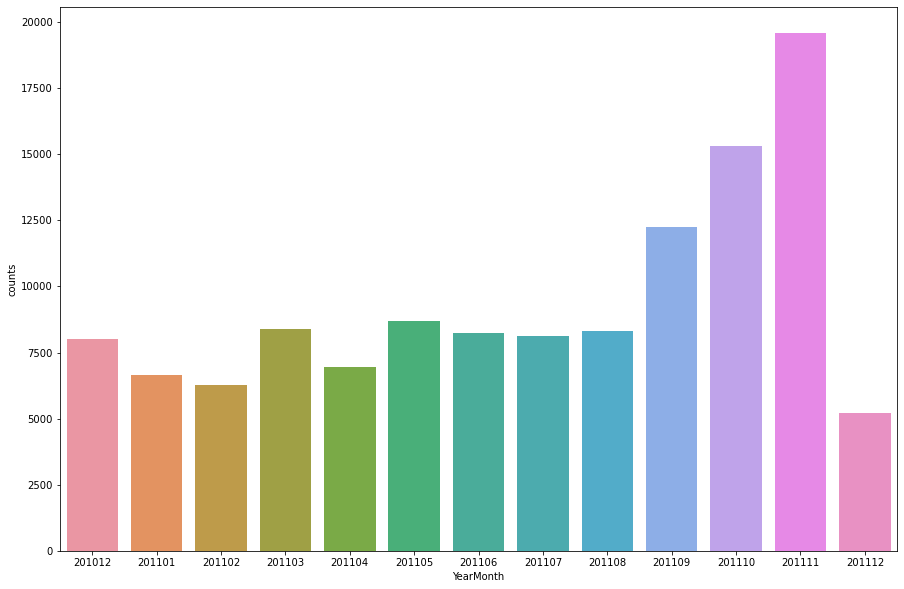

In [50]:
#Visualizing Counts based on year/Month
ValueCounts(test, 'YearMonth')

In [51]:
#removing unused columns from test df
test = test.drop(columns=["Description", "CustomerID", "InvoiceNo", "InvoiceDate",'Year','Month'], axis = 1)

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284780 entries, 0 to 284779
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   StockCode  284780 non-null  int64  
 1   Quantity   284780 non-null  int64  
 2   Country    284780 non-null  int64  
 3   YearMonth  284780 non-null  int64  
 4   UnitPrice  284780 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 13.0 MB


In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   StockCode  122049 non-null  int64
 1   Quantity   122049 non-null  int64
 2   Country    122049 non-null  int64
 3   YearMonth  122049 non-null  int64
dtypes: int64(4)
memory usage: 3.7 MB


In [54]:
train.head(2)

,StockCode,Quantity,Country,YearMonth,UnitPrice
0,1583,3,35,201105,3.75
1,1300,6,35,201105,1.95


In [55]:
test.head(2)

,StockCode,Quantity,Country,YearMonth
0,1709,3,35,201102
1,510,1,35,201012


In [56]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler


In [57]:
X = train.drop(columns=['UnitPrice'], axis=1)
y = train['UnitPrice']

labEncoder = LabelEncoder()
X['YearMonth'] = labEncoder.fit_transform(X['YearMonth'])
test['YearMonth'] = labEncoder.transform(test['YearMonth'])

powerTransformer = PowerTransformer()
qty = X['Quantity'].values.reshape(-1,1)
qty1 = test["Quantity"].values.reshape(-1,1)
qty = powerTransformer.fit_transform(qty)
qty1 = powerTransformer.transform(qty1)
#Appending the transformed columns back to the data frame
X['Quantity'] = pd.DataFrame(data=qty)
test['Quantity'] = pd.DataFrame(data=qty1)

minMax = MinMaxScaler()
stockcode = X['StockCode'].values.reshape(-1,1)
stockcode1 = test['StockCode'].values.reshape(-1,1)
stockcode = minMax.fit_transform(stockcode)
stockcode1 = minMax.transform(stockcode1)
#Appending the transformed columns back to the data frame
X['StockCode'] = pd.DataFrame(data=stockcode)
test['StockCode'] = pd.DataFrame(data=stockcode1)

countryMinMax = MinMaxScaler()
cntry = X['Country'].values.reshape(-1,1)
cntry1 = test['Country'].values.reshape(-1,1)
cntry = minMax.fit_transform(cntry)
cntry1 = minMax.transform(cntry1)
#Appending the transformed columns back to the data frame
X['Country'] = pd.DataFrame(data=cntry)
test['Country'] = pd.DataFrame(data=cntry1)

output_power_trans = PowerTransformer()
y = y.values.reshape(-1,1)
y = output_power_trans.fit_transform(y)


In [58]:
X.head()

,StockCode,Quantity,Country,YearMonth
0,0.429813,-0.031586,0.972222,5
1,0.352973,-0.021362,0.972222,5
2,0.591366,-0.028183,0.972222,11
3,0.574260,-0.038367,0.972222,11
4,0.328537,-0.000816,0.972222,5


In [59]:
test.head()

,StockCode,Quantity,Country,YearMonth
0,0.464024,-0.031586,0.972222,2
1,0.138474,-0.038367,0.972222,0
2,0.163997,0.081974,0.972222,10
3,0.401303,-0.034981,0.972222,6
4,0.873201,-0.038367,0.972222,11


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =42)


In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
from catboost import CatBoostRegressor

In [63]:
from sklearn.pipeline import Pipeline
pipelines = []
pipelines.append(('model_linReg', Pipeline([('LR',LinearRegression())])))
pipelines.append(('model_GBRegressor', Pipeline([('GBR', GradientBoostingRegressor())])))
pipelines.append(('ExtremeGradientBRegressor',Pipeline([('XGBR',xgb.XGBRegressor())])))
pipelines.append(('model_RFRegressor', Pipeline([('RF', RandomForestRegressor())])))
pipelines.append(('model_CBRegressor', Pipeline([('CBR', CatBoostRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

model_linReg: -0.984173 (0.007696)
model_GBRegressor: -0.561599 (0.007062)
ExtremeGradientBRegressor: -0.148998 (0.004064)
model_RFRegressor: -0.048990 (0.002702)
Learning rate set to 0.098307
0:	learn: 0.9758258	total: 129ms	remaining: 2m 9s
1:	learn: 0.9557099	total: 151ms	remaining: 1m 15s
2:	learn: 0.9392763	total: 166ms	remaining: 55.2s
3:	learn: 0.9253342	total: 183ms	remaining: 45.5s
4:	learn: 0.9130981	total: 199ms	remaining: 39.7s
5:	learn: 0.9028731	total: 215ms	remaining: 35.7s
6:	learn: 0.8939174	total: 233ms	remaining: 33s
7:	learn: 0.8868106	total: 249ms	remaining: 30.9s
8:	learn: 0.8805609	total: 265ms	remaining: 29.2s
9:	learn: 0.8741728	total: 281ms	remaining: 27.9s
10:	learn: 0.8695824	total: 297ms	remaining: 26.7s
11:	learn: 0.8651364	total: 312ms	remaining: 25.7s
12:	learn: 0.8614303	total: 329ms	remaining: 24.9s
13:	learn: 0.8583005	total: 352ms	remaining: 24.8s
14:	learn: 0.8548235	total: 382ms	remaining: 25.1s
15:	learn: 0.8524185	total: 399ms	remaining: 24.5s
16

164:	learn: 0.7259224	total: 3.07s	remaining: 15.5s
165:	learn: 0.7256246	total: 3.09s	remaining: 15.5s
166:	learn: 0.7254834	total: 3.11s	remaining: 15.5s
167:	learn: 0.7252850	total: 3.12s	remaining: 15.5s
168:	learn: 0.7246522	total: 3.14s	remaining: 15.4s
169:	learn: 0.7244268	total: 3.16s	remaining: 15.4s
170:	learn: 0.7239203	total: 3.17s	remaining: 15.4s
171:	learn: 0.7233617	total: 3.19s	remaining: 15.4s
172:	learn: 0.7232320	total: 3.21s	remaining: 15.3s
173:	learn: 0.7227591	total: 3.22s	remaining: 15.3s
174:	learn: 0.7220422	total: 3.24s	remaining: 15.3s
175:	learn: 0.7216071	total: 3.26s	remaining: 15.2s
176:	learn: 0.7211943	total: 3.28s	remaining: 15.2s
177:	learn: 0.7209498	total: 3.29s	remaining: 15.2s
178:	learn: 0.7206725	total: 3.31s	remaining: 15.2s
179:	learn: 0.7204465	total: 3.33s	remaining: 15.2s
180:	learn: 0.7196931	total: 3.35s	remaining: 15.2s
181:	learn: 0.7191450	total: 3.37s	remaining: 15.1s
182:	learn: 0.7186593	total: 3.39s	remaining: 15.1s
183:	learn: 

333:	learn: 0.6753882	total: 6s	remaining: 12s
334:	learn: 0.6750609	total: 6.03s	remaining: 12s
335:	learn: 0.6749631	total: 6.05s	remaining: 12s
336:	learn: 0.6748575	total: 6.07s	remaining: 11.9s
337:	learn: 0.6746880	total: 6.08s	remaining: 11.9s
338:	learn: 0.6743853	total: 6.1s	remaining: 11.9s
339:	learn: 0.6741474	total: 6.12s	remaining: 11.9s
340:	learn: 0.6740117	total: 6.13s	remaining: 11.9s
341:	learn: 0.6738785	total: 6.15s	remaining: 11.8s
342:	learn: 0.6736795	total: 6.17s	remaining: 11.8s
343:	learn: 0.6734814	total: 6.18s	remaining: 11.8s
344:	learn: 0.6734142	total: 6.2s	remaining: 11.8s
345:	learn: 0.6731983	total: 6.22s	remaining: 11.8s
346:	learn: 0.6730803	total: 6.24s	remaining: 11.7s
347:	learn: 0.6729440	total: 6.26s	remaining: 11.7s
348:	learn: 0.6728012	total: 6.27s	remaining: 11.7s
349:	learn: 0.6726586	total: 6.29s	remaining: 11.7s
350:	learn: 0.6725826	total: 6.3s	remaining: 11.7s
351:	learn: 0.6724197	total: 6.32s	remaining: 11.6s
352:	learn: 0.6723643	to

503:	learn: 0.6504986	total: 8.95s	remaining: 8.81s
504:	learn: 0.6503496	total: 8.97s	remaining: 8.79s
505:	learn: 0.6502972	total: 8.99s	remaining: 8.78s
506:	learn: 0.6502421	total: 9.01s	remaining: 8.76s
507:	learn: 0.6501943	total: 9.02s	remaining: 8.74s
508:	learn: 0.6501224	total: 9.04s	remaining: 8.72s
509:	learn: 0.6499562	total: 9.05s	remaining: 8.7s
510:	learn: 0.6498167	total: 9.07s	remaining: 8.68s
511:	learn: 0.6497693	total: 9.09s	remaining: 8.66s
512:	learn: 0.6495635	total: 9.1s	remaining: 8.64s
513:	learn: 0.6495057	total: 9.12s	remaining: 8.62s
514:	learn: 0.6494198	total: 9.14s	remaining: 8.61s
515:	learn: 0.6493672	total: 9.17s	remaining: 8.6s
516:	learn: 0.6492743	total: 9.18s	remaining: 8.58s
517:	learn: 0.6490899	total: 9.2s	remaining: 8.56s
518:	learn: 0.6490416	total: 9.22s	remaining: 8.54s
519:	learn: 0.6488586	total: 9.23s	remaining: 8.53s
520:	learn: 0.6487832	total: 9.25s	remaining: 8.51s
521:	learn: 0.6487147	total: 9.27s	remaining: 8.48s
522:	learn: 0.64

662:	learn: 0.6349629	total: 11.7s	remaining: 5.96s
663:	learn: 0.6349294	total: 11.7s	remaining: 5.94s
664:	learn: 0.6348456	total: 11.8s	remaining: 5.92s
665:	learn: 0.6347389	total: 11.8s	remaining: 5.91s
666:	learn: 0.6346398	total: 11.8s	remaining: 5.89s
667:	learn: 0.6345237	total: 11.8s	remaining: 5.87s
668:	learn: 0.6344517	total: 11.8s	remaining: 5.85s
669:	learn: 0.6343441	total: 11.8s	remaining: 5.83s
670:	learn: 0.6342452	total: 11.9s	remaining: 5.82s
671:	learn: 0.6341701	total: 11.9s	remaining: 5.8s
672:	learn: 0.6340920	total: 11.9s	remaining: 5.78s
673:	learn: 0.6340680	total: 11.9s	remaining: 5.76s
674:	learn: 0.6340440	total: 11.9s	remaining: 5.74s
675:	learn: 0.6340074	total: 11.9s	remaining: 5.73s
676:	learn: 0.6339742	total: 12s	remaining: 5.71s
677:	learn: 0.6338871	total: 12s	remaining: 5.69s
678:	learn: 0.6337863	total: 12s	remaining: 5.67s
679:	learn: 0.6337231	total: 12s	remaining: 5.65s
680:	learn: 0.6336658	total: 12s	remaining: 5.63s
681:	learn: 0.6335968	t

829:	learn: 0.6234540	total: 14.6s	remaining: 2.99s
830:	learn: 0.6234188	total: 14.6s	remaining: 2.98s
831:	learn: 0.6233752	total: 14.7s	remaining: 2.96s
832:	learn: 0.6233509	total: 14.7s	remaining: 2.94s
833:	learn: 0.6232860	total: 14.7s	remaining: 2.92s
834:	learn: 0.6231870	total: 14.7s	remaining: 2.9s
835:	learn: 0.6230496	total: 14.7s	remaining: 2.89s
836:	learn: 0.6230027	total: 14.7s	remaining: 2.87s
837:	learn: 0.6229812	total: 14.8s	remaining: 2.85s
838:	learn: 0.6229168	total: 14.8s	remaining: 2.83s
839:	learn: 0.6228431	total: 14.8s	remaining: 2.81s
840:	learn: 0.6228165	total: 14.8s	remaining: 2.8s
841:	learn: 0.6227824	total: 14.8s	remaining: 2.78s
842:	learn: 0.6227186	total: 14.8s	remaining: 2.76s
843:	learn: 0.6226882	total: 14.9s	remaining: 2.75s
844:	learn: 0.6226598	total: 14.9s	remaining: 2.73s
845:	learn: 0.6226364	total: 14.9s	remaining: 2.71s
846:	learn: 0.6225736	total: 14.9s	remaining: 2.69s
847:	learn: 0.6225237	total: 14.9s	remaining: 2.67s
848:	learn: 0.

995:	learn: 0.6158289	total: 17.6s	remaining: 70.8ms
996:	learn: 0.6158096	total: 17.6s	remaining: 53.1ms
997:	learn: 0.6157913	total: 17.7s	remaining: 35.4ms
998:	learn: 0.6157565	total: 17.7s	remaining: 17.7ms
999:	learn: 0.6157303	total: 17.7s	remaining: 0us
Learning rate set to 0.098307
0:	learn: 0.9756871	total: 26ms	remaining: 26s
1:	learn: 0.9563726	total: 49.7ms	remaining: 24.8s
2:	learn: 0.9395701	total: 73.1ms	remaining: 24.3s
3:	learn: 0.9257853	total: 92.3ms	remaining: 23s
4:	learn: 0.9135307	total: 109ms	remaining: 21.7s
5:	learn: 0.9034387	total: 125ms	remaining: 20.8s
6:	learn: 0.8944690	total: 143ms	remaining: 20.2s
7:	learn: 0.8875394	total: 158ms	remaining: 19.6s
8:	learn: 0.8799519	total: 176ms	remaining: 19.4s
9:	learn: 0.8743878	total: 201ms	remaining: 19.9s
10:	learn: 0.8691901	total: 221ms	remaining: 19.9s
11:	learn: 0.8643904	total: 237ms	remaining: 19.5s
12:	learn: 0.8608889	total: 253ms	remaining: 19.2s
13:	learn: 0.8570084	total: 269ms	remaining: 18.9s
14:	le

166:	learn: 0.7264629	total: 2.91s	remaining: 14.5s
167:	learn: 0.7260525	total: 2.94s	remaining: 14.6s
168:	learn: 0.7254860	total: 2.96s	remaining: 14.5s
169:	learn: 0.7249045	total: 2.97s	remaining: 14.5s
170:	learn: 0.7244310	total: 2.99s	remaining: 14.5s
171:	learn: 0.7240127	total: 3.01s	remaining: 14.5s
172:	learn: 0.7235140	total: 3.02s	remaining: 14.4s
173:	learn: 0.7230798	total: 3.04s	remaining: 14.4s
174:	learn: 0.7226547	total: 3.06s	remaining: 14.4s
175:	learn: 0.7221361	total: 3.07s	remaining: 14.4s
176:	learn: 0.7217780	total: 3.09s	remaining: 14.4s
177:	learn: 0.7215271	total: 3.1s	remaining: 14.3s
178:	learn: 0.7211654	total: 3.12s	remaining: 14.3s
179:	learn: 0.7209756	total: 3.15s	remaining: 14.3s
180:	learn: 0.7205415	total: 3.17s	remaining: 14.3s
181:	learn: 0.7202987	total: 3.18s	remaining: 14.3s
182:	learn: 0.7196722	total: 3.2s	remaining: 14.3s
183:	learn: 0.7193799	total: 3.21s	remaining: 14.3s
184:	learn: 0.7188276	total: 3.23s	remaining: 14.2s
185:	learn: 0.

326:	learn: 0.6815410	total: 5.66s	remaining: 11.6s
327:	learn: 0.6813954	total: 5.68s	remaining: 11.6s
328:	learn: 0.6812951	total: 5.7s	remaining: 11.6s
329:	learn: 0.6810560	total: 5.72s	remaining: 11.6s
330:	learn: 0.6809334	total: 5.73s	remaining: 11.6s
331:	learn: 0.6805915	total: 5.75s	remaining: 11.6s
332:	learn: 0.6803983	total: 5.77s	remaining: 11.6s
333:	learn: 0.6802756	total: 5.78s	remaining: 11.5s
334:	learn: 0.6800622	total: 5.8s	remaining: 11.5s
335:	learn: 0.6799560	total: 5.82s	remaining: 11.5s
336:	learn: 0.6798451	total: 5.83s	remaining: 11.5s
337:	learn: 0.6795746	total: 5.85s	remaining: 11.5s
338:	learn: 0.6793617	total: 5.87s	remaining: 11.5s
339:	learn: 0.6791500	total: 5.89s	remaining: 11.4s
340:	learn: 0.6789868	total: 5.91s	remaining: 11.4s
341:	learn: 0.6786503	total: 5.93s	remaining: 11.4s
342:	learn: 0.6785460	total: 5.95s	remaining: 11.4s
343:	learn: 0.6783189	total: 5.96s	remaining: 11.4s
344:	learn: 0.6782460	total: 5.98s	remaining: 11.3s
345:	learn: 0.

495:	learn: 0.6553934	total: 8.59s	remaining: 8.73s
496:	learn: 0.6553438	total: 8.61s	remaining: 8.72s
497:	learn: 0.6552710	total: 8.63s	remaining: 8.7s
498:	learn: 0.6551313	total: 8.65s	remaining: 8.68s
499:	learn: 0.6549759	total: 8.67s	remaining: 8.67s
500:	learn: 0.6548588	total: 8.68s	remaining: 8.65s
501:	learn: 0.6547513	total: 8.7s	remaining: 8.63s
502:	learn: 0.6546668	total: 8.71s	remaining: 8.61s
503:	learn: 0.6546287	total: 8.73s	remaining: 8.59s
504:	learn: 0.6545947	total: 8.74s	remaining: 8.57s
505:	learn: 0.6545609	total: 8.76s	remaining: 8.55s
506:	learn: 0.6543926	total: 8.77s	remaining: 8.53s
507:	learn: 0.6543305	total: 8.79s	remaining: 8.51s
508:	learn: 0.6541316	total: 8.82s	remaining: 8.51s
509:	learn: 0.6540366	total: 8.84s	remaining: 8.49s
510:	learn: 0.6539559	total: 8.85s	remaining: 8.47s
511:	learn: 0.6538810	total: 8.87s	remaining: 8.45s
512:	learn: 0.6537574	total: 8.88s	remaining: 8.44s
513:	learn: 0.6535123	total: 8.9s	remaining: 8.42s
514:	learn: 0.6

654:	learn: 0.6407962	total: 11.4s	remaining: 5.98s
655:	learn: 0.6407619	total: 11.4s	remaining: 5.97s
656:	learn: 0.6407167	total: 11.4s	remaining: 5.95s
657:	learn: 0.6406756	total: 11.4s	remaining: 5.93s
658:	learn: 0.6403769	total: 11.4s	remaining: 5.91s
659:	learn: 0.6403034	total: 11.4s	remaining: 5.89s
660:	learn: 0.6401618	total: 11.5s	remaining: 5.88s
661:	learn: 0.6400971	total: 11.5s	remaining: 5.86s
662:	learn: 0.6400674	total: 11.5s	remaining: 5.84s
663:	learn: 0.6399483	total: 11.5s	remaining: 5.82s
664:	learn: 0.6398302	total: 11.5s	remaining: 5.81s
665:	learn: 0.6397250	total: 11.5s	remaining: 5.79s
666:	learn: 0.6396586	total: 11.6s	remaining: 5.77s
667:	learn: 0.6396369	total: 11.6s	remaining: 5.76s
668:	learn: 0.6395885	total: 11.6s	remaining: 5.74s
669:	learn: 0.6395399	total: 11.6s	remaining: 5.72s
670:	learn: 0.6393908	total: 11.6s	remaining: 5.7s
671:	learn: 0.6393395	total: 11.7s	remaining: 5.69s
672:	learn: 0.6392298	total: 11.7s	remaining: 5.67s
673:	learn: 0

825:	learn: 0.6291105	total: 14.5s	remaining: 3.05s
826:	learn: 0.6290899	total: 14.5s	remaining: 3.03s
827:	learn: 0.6289726	total: 14.5s	remaining: 3.01s
828:	learn: 0.6289417	total: 14.5s	remaining: 3s
829:	learn: 0.6289195	total: 14.5s	remaining: 2.98s
830:	learn: 0.6288865	total: 14.6s	remaining: 2.96s
831:	learn: 0.6288560	total: 14.6s	remaining: 2.94s
832:	learn: 0.6288103	total: 14.6s	remaining: 2.92s
833:	learn: 0.6287695	total: 14.6s	remaining: 2.91s
834:	learn: 0.6287393	total: 14.6s	remaining: 2.89s
835:	learn: 0.6287233	total: 14.6s	remaining: 2.87s
836:	learn: 0.6286274	total: 14.7s	remaining: 2.85s
837:	learn: 0.6285438	total: 14.7s	remaining: 2.83s
838:	learn: 0.6284386	total: 14.7s	remaining: 2.82s
839:	learn: 0.6284043	total: 14.7s	remaining: 2.8s
840:	learn: 0.6282721	total: 14.7s	remaining: 2.78s
841:	learn: 0.6281705	total: 14.7s	remaining: 2.77s
842:	learn: 0.6280995	total: 14.8s	remaining: 2.75s
843:	learn: 0.6280459	total: 14.8s	remaining: 2.73s
844:	learn: 0.62

986:	learn: 0.6207460	total: 17.2s	remaining: 227ms
987:	learn: 0.6206966	total: 17.3s	remaining: 210ms
988:	learn: 0.6206315	total: 17.3s	remaining: 192ms
989:	learn: 0.6205711	total: 17.3s	remaining: 175ms
990:	learn: 0.6204864	total: 17.3s	remaining: 157ms
991:	learn: 0.6204656	total: 17.3s	remaining: 140ms
992:	learn: 0.6204085	total: 17.3s	remaining: 122ms
993:	learn: 0.6203819	total: 17.4s	remaining: 105ms
994:	learn: 0.6203182	total: 17.4s	remaining: 87.3ms
995:	learn: 0.6202979	total: 17.4s	remaining: 69.8ms
996:	learn: 0.6202429	total: 17.4s	remaining: 52.4ms
997:	learn: 0.6202143	total: 17.4s	remaining: 34.9ms
998:	learn: 0.6202031	total: 17.4s	remaining: 17.4ms
999:	learn: 0.6201313	total: 17.5s	remaining: 0us
Learning rate set to 0.098307
0:	learn: 0.9753538	total: 25.7ms	remaining: 25.7s
1:	learn: 0.9561733	total: 49.6ms	remaining: 24.7s
2:	learn: 0.9395338	total: 72.7ms	remaining: 24.2s
3:	learn: 0.9255842	total: 92.4ms	remaining: 23s
4:	learn: 0.9132435	total: 109ms	rema

146:	learn: 0.7354508	total: 2.54s	remaining: 14.7s
147:	learn: 0.7346580	total: 2.56s	remaining: 14.8s
148:	learn: 0.7343974	total: 2.58s	remaining: 14.7s
149:	learn: 0.7338182	total: 2.6s	remaining: 14.7s
150:	learn: 0.7331368	total: 2.62s	remaining: 14.7s
151:	learn: 0.7329629	total: 2.63s	remaining: 14.7s
152:	learn: 0.7325528	total: 2.65s	remaining: 14.6s
153:	learn: 0.7319031	total: 2.66s	remaining: 14.6s
154:	learn: 0.7311861	total: 2.68s	remaining: 14.6s
155:	learn: 0.7307015	total: 2.7s	remaining: 14.6s
156:	learn: 0.7304938	total: 2.71s	remaining: 14.6s
157:	learn: 0.7298700	total: 2.73s	remaining: 14.5s
158:	learn: 0.7294064	total: 2.75s	remaining: 14.5s
159:	learn: 0.7291021	total: 2.77s	remaining: 14.6s
160:	learn: 0.7288222	total: 2.79s	remaining: 14.5s
161:	learn: 0.7283901	total: 2.81s	remaining: 14.5s
162:	learn: 0.7282708	total: 2.82s	remaining: 14.5s
163:	learn: 0.7279531	total: 2.84s	remaining: 14.5s
164:	learn: 0.7271057	total: 2.85s	remaining: 14.4s
165:	learn: 0.

315:	learn: 0.6813442	total: 5.46s	remaining: 11.8s
316:	learn: 0.6812494	total: 5.48s	remaining: 11.8s
317:	learn: 0.6808329	total: 5.49s	remaining: 11.8s
318:	learn: 0.6805622	total: 5.51s	remaining: 11.8s
319:	learn: 0.6803374	total: 5.53s	remaining: 11.7s
320:	learn: 0.6801074	total: 5.54s	remaining: 11.7s
321:	learn: 0.6797045	total: 5.56s	remaining: 11.7s
322:	learn: 0.6794978	total: 5.58s	remaining: 11.7s
323:	learn: 0.6788360	total: 5.6s	remaining: 11.7s
324:	learn: 0.6785249	total: 5.61s	remaining: 11.7s
325:	learn: 0.6781560	total: 5.63s	remaining: 11.6s
326:	learn: 0.6779941	total: 5.65s	remaining: 11.6s
327:	learn: 0.6776483	total: 5.67s	remaining: 11.6s
328:	learn: 0.6775256	total: 5.69s	remaining: 11.6s
329:	learn: 0.6773915	total: 5.71s	remaining: 11.6s
330:	learn: 0.6771319	total: 5.73s	remaining: 11.6s
331:	learn: 0.6769010	total: 5.74s	remaining: 11.6s
332:	learn: 0.6768460	total: 5.76s	remaining: 11.5s
333:	learn: 0.6766025	total: 5.78s	remaining: 11.5s
334:	learn: 0

480:	learn: 0.6522954	total: 8.44s	remaining: 9.11s
481:	learn: 0.6521178	total: 8.46s	remaining: 9.1s
482:	learn: 0.6520692	total: 8.49s	remaining: 9.08s
483:	learn: 0.6518861	total: 8.51s	remaining: 9.07s
484:	learn: 0.6517491	total: 8.54s	remaining: 9.07s
485:	learn: 0.6516748	total: 8.56s	remaining: 9.06s
486:	learn: 0.6516304	total: 8.59s	remaining: 9.05s
487:	learn: 0.6515000	total: 8.61s	remaining: 9.03s
488:	learn: 0.6514002	total: 8.63s	remaining: 9.02s
489:	learn: 0.6513477	total: 8.65s	remaining: 9s
490:	learn: 0.6512069	total: 8.67s	remaining: 8.99s
491:	learn: 0.6510487	total: 8.69s	remaining: 8.97s
492:	learn: 0.6509952	total: 8.71s	remaining: 8.96s
493:	learn: 0.6508882	total: 8.72s	remaining: 8.94s
494:	learn: 0.6507138	total: 8.74s	remaining: 8.92s
495:	learn: 0.6506671	total: 8.76s	remaining: 8.9s
496:	learn: 0.6506275	total: 8.77s	remaining: 8.88s
497:	learn: 0.6505755	total: 8.79s	remaining: 8.86s
498:	learn: 0.6504328	total: 8.8s	remaining: 8.84s
499:	learn: 0.6503

643:	learn: 0.6364756	total: 11.4s	remaining: 6.29s
644:	learn: 0.6364147	total: 11.4s	remaining: 6.28s
645:	learn: 0.6363487	total: 11.4s	remaining: 6.26s
646:	learn: 0.6361839	total: 11.4s	remaining: 6.25s
647:	learn: 0.6361081	total: 11.5s	remaining: 6.23s
648:	learn: 0.6359996	total: 11.5s	remaining: 6.22s
649:	learn: 0.6359537	total: 11.5s	remaining: 6.2s
650:	learn: 0.6358163	total: 11.5s	remaining: 6.18s
651:	learn: 0.6356793	total: 11.6s	remaining: 6.17s
652:	learn: 0.6356542	total: 11.6s	remaining: 6.15s
653:	learn: 0.6355993	total: 11.6s	remaining: 6.14s
654:	learn: 0.6355232	total: 11.6s	remaining: 6.13s
655:	learn: 0.6354596	total: 11.7s	remaining: 6.11s
656:	learn: 0.6353632	total: 11.7s	remaining: 6.1s
657:	learn: 0.6353419	total: 11.7s	remaining: 6.08s
658:	learn: 0.6353107	total: 11.7s	remaining: 6.06s
659:	learn: 0.6352583	total: 11.7s	remaining: 6.05s
660:	learn: 0.6351976	total: 11.8s	remaining: 6.03s
661:	learn: 0.6351581	total: 11.8s	remaining: 6.01s
662:	learn: 0.

808:	learn: 0.6254209	total: 14.3s	remaining: 3.38s
809:	learn: 0.6253337	total: 14.3s	remaining: 3.37s
810:	learn: 0.6252691	total: 14.4s	remaining: 3.35s
811:	learn: 0.6252475	total: 14.4s	remaining: 3.33s
812:	learn: 0.6251749	total: 14.4s	remaining: 3.31s
813:	learn: 0.6251292	total: 14.4s	remaining: 3.29s
814:	learn: 0.6250224	total: 14.4s	remaining: 3.28s
815:	learn: 0.6249759	total: 14.5s	remaining: 3.26s
816:	learn: 0.6249571	total: 14.5s	remaining: 3.24s
817:	learn: 0.6248940	total: 14.5s	remaining: 3.22s
818:	learn: 0.6248622	total: 14.5s	remaining: 3.2s
819:	learn: 0.6248030	total: 14.5s	remaining: 3.19s
820:	learn: 0.6247744	total: 14.5s	remaining: 3.17s
821:	learn: 0.6247460	total: 14.6s	remaining: 3.15s
822:	learn: 0.6246586	total: 14.6s	remaining: 3.13s
823:	learn: 0.6246359	total: 14.6s	remaining: 3.12s
824:	learn: 0.6245766	total: 14.6s	remaining: 3.1s
825:	learn: 0.6245045	total: 14.6s	remaining: 3.08s
826:	learn: 0.6244840	total: 14.6s	remaining: 3.06s
827:	learn: 0.

967:	learn: 0.6172375	total: 17s	remaining: 563ms
968:	learn: 0.6171777	total: 17.1s	remaining: 546ms
969:	learn: 0.6170702	total: 17.1s	remaining: 528ms
970:	learn: 0.6170341	total: 17.1s	remaining: 510ms
971:	learn: 0.6170015	total: 17.1s	remaining: 493ms
972:	learn: 0.6169695	total: 17.1s	remaining: 475ms
973:	learn: 0.6169606	total: 17.1s	remaining: 457ms
974:	learn: 0.6169364	total: 17.1s	remaining: 440ms
975:	learn: 0.6168300	total: 17.2s	remaining: 422ms
976:	learn: 0.6167433	total: 17.2s	remaining: 405ms
977:	learn: 0.6167135	total: 17.2s	remaining: 387ms
978:	learn: 0.6166894	total: 17.2s	remaining: 369ms
979:	learn: 0.6166664	total: 17.2s	remaining: 352ms
980:	learn: 0.6166172	total: 17.3s	remaining: 334ms
981:	learn: 0.6166074	total: 17.3s	remaining: 317ms
982:	learn: 0.6165589	total: 17.3s	remaining: 299ms
983:	learn: 0.6165073	total: 17.3s	remaining: 281ms
984:	learn: 0.6164493	total: 17.3s	remaining: 264ms
985:	learn: 0.6164154	total: 17.3s	remaining: 246ms
986:	learn: 0.

130:	learn: 0.7361198	total: 2.29s	remaining: 15.2s
131:	learn: 0.7356452	total: 2.31s	remaining: 15.2s
132:	learn: 0.7348575	total: 2.33s	remaining: 15.2s
133:	learn: 0.7344752	total: 2.35s	remaining: 15.2s
134:	learn: 0.7340929	total: 2.36s	remaining: 15.1s
135:	learn: 0.7333955	total: 2.38s	remaining: 15.1s
136:	learn: 0.7329822	total: 2.4s	remaining: 15.1s
137:	learn: 0.7322491	total: 2.41s	remaining: 15.1s
138:	learn: 0.7315060	total: 2.43s	remaining: 15.1s
139:	learn: 0.7312641	total: 2.44s	remaining: 15s
140:	learn: 0.7307934	total: 2.46s	remaining: 15s
141:	learn: 0.7298581	total: 2.48s	remaining: 15s
142:	learn: 0.7291796	total: 2.5s	remaining: 15s
143:	learn: 0.7288831	total: 2.52s	remaining: 15s
144:	learn: 0.7283755	total: 2.54s	remaining: 15s
145:	learn: 0.7277249	total: 2.56s	remaining: 15s
146:	learn: 0.7272041	total: 2.58s	remaining: 14.9s
147:	learn: 0.7264523	total: 2.59s	remaining: 14.9s
148:	learn: 0.7263014	total: 2.61s	remaining: 14.9s
149:	learn: 0.7257373	total:

298:	learn: 0.6783881	total: 5.2s	remaining: 12.2s
299:	learn: 0.6782895	total: 5.23s	remaining: 12.2s
300:	learn: 0.6778788	total: 5.24s	remaining: 12.2s
301:	learn: 0.6777883	total: 5.26s	remaining: 12.2s
302:	learn: 0.6775325	total: 5.28s	remaining: 12.1s
303:	learn: 0.6774628	total: 5.29s	remaining: 12.1s
304:	learn: 0.6773845	total: 5.31s	remaining: 12.1s
305:	learn: 0.6771745	total: 5.32s	remaining: 12.1s
306:	learn: 0.6769481	total: 5.34s	remaining: 12.1s
307:	learn: 0.6768659	total: 5.36s	remaining: 12s
308:	learn: 0.6764168	total: 5.37s	remaining: 12s
309:	learn: 0.6762001	total: 5.39s	remaining: 12s
310:	learn: 0.6758658	total: 5.41s	remaining: 12s
311:	learn: 0.6756415	total: 5.44s	remaining: 12s
312:	learn: 0.6754314	total: 5.46s	remaining: 12s
313:	learn: 0.6752271	total: 5.47s	remaining: 12s
314:	learn: 0.6748857	total: 5.49s	remaining: 11.9s
315:	learn: 0.6746421	total: 5.51s	remaining: 11.9s
316:	learn: 0.6743427	total: 5.52s	remaining: 11.9s
317:	learn: 0.6741380	total

468:	learn: 0.6498788	total: 8.14s	remaining: 9.22s
469:	learn: 0.6496974	total: 8.17s	remaining: 9.21s
470:	learn: 0.6496604	total: 8.19s	remaining: 9.2s
471:	learn: 0.6496233	total: 8.2s	remaining: 9.18s
472:	learn: 0.6494990	total: 8.22s	remaining: 9.16s
473:	learn: 0.6494661	total: 8.23s	remaining: 9.14s
474:	learn: 0.6493005	total: 8.25s	remaining: 9.12s
475:	learn: 0.6492548	total: 8.27s	remaining: 9.1s
476:	learn: 0.6490777	total: 8.28s	remaining: 9.08s
477:	learn: 0.6488601	total: 8.3s	remaining: 9.06s
478:	learn: 0.6487451	total: 8.32s	remaining: 9.05s
479:	learn: 0.6485766	total: 8.33s	remaining: 9.03s
480:	learn: 0.6485594	total: 8.35s	remaining: 9.01s
481:	learn: 0.6484563	total: 8.38s	remaining: 9s
482:	learn: 0.6482733	total: 8.39s	remaining: 8.99s
483:	learn: 0.6479592	total: 8.41s	remaining: 8.97s
484:	learn: 0.6478961	total: 8.43s	remaining: 8.95s
485:	learn: 0.6477537	total: 8.44s	remaining: 8.93s
486:	learn: 0.6477037	total: 8.46s	remaining: 8.91s
487:	learn: 0.64759

630:	learn: 0.6333589	total: 11.1s	remaining: 6.5s
631:	learn: 0.6333108	total: 11.1s	remaining: 6.49s
632:	learn: 0.6331506	total: 11.2s	remaining: 6.47s
633:	learn: 0.6331273	total: 11.2s	remaining: 6.46s
634:	learn: 0.6329958	total: 11.2s	remaining: 6.44s
635:	learn: 0.6328783	total: 11.2s	remaining: 6.42s
636:	learn: 0.6328482	total: 11.2s	remaining: 6.4s
637:	learn: 0.6327326	total: 11.3s	remaining: 6.38s
638:	learn: 0.6327033	total: 11.3s	remaining: 6.37s
639:	learn: 0.6326340	total: 11.3s	remaining: 6.35s
640:	learn: 0.6325150	total: 11.3s	remaining: 6.33s
641:	learn: 0.6323223	total: 11.3s	remaining: 6.31s
642:	learn: 0.6322846	total: 11.3s	remaining: 6.29s
643:	learn: 0.6322173	total: 11.4s	remaining: 6.28s
644:	learn: 0.6321320	total: 11.4s	remaining: 6.26s
645:	learn: 0.6320402	total: 11.4s	remaining: 6.24s
646:	learn: 0.6319340	total: 11.4s	remaining: 6.22s
647:	learn: 0.6317645	total: 11.4s	remaining: 6.21s
648:	learn: 0.6317337	total: 11.4s	remaining: 6.19s
649:	learn: 0.

799:	learn: 0.6203263	total: 14.1s	remaining: 3.52s
800:	learn: 0.6202684	total: 14.1s	remaining: 3.5s
801:	learn: 0.6202492	total: 14.1s	remaining: 3.48s
802:	learn: 0.6201778	total: 14.1s	remaining: 3.47s
803:	learn: 0.6201501	total: 14.1s	remaining: 3.45s
804:	learn: 0.6201308	total: 14.2s	remaining: 3.43s
805:	learn: 0.6200166	total: 14.2s	remaining: 3.41s
806:	learn: 0.6199404	total: 14.2s	remaining: 3.4s
807:	learn: 0.6198263	total: 14.2s	remaining: 3.38s
808:	learn: 0.6197607	total: 14.2s	remaining: 3.36s
809:	learn: 0.6197166	total: 14.2s	remaining: 3.34s
810:	learn: 0.6196500	total: 14.3s	remaining: 3.32s
811:	learn: 0.6195888	total: 14.3s	remaining: 3.31s
812:	learn: 0.6195151	total: 14.3s	remaining: 3.29s
813:	learn: 0.6194876	total: 14.3s	remaining: 3.27s
814:	learn: 0.6194206	total: 14.3s	remaining: 3.25s
815:	learn: 0.6193885	total: 14.4s	remaining: 3.24s
816:	learn: 0.6193143	total: 14.4s	remaining: 3.22s
817:	learn: 0.6192733	total: 14.4s	remaining: 3.2s
818:	learn: 0.6

968:	learn: 0.6118283	total: 17s	remaining: 543ms
969:	learn: 0.6117991	total: 17s	remaining: 526ms
970:	learn: 0.6117340	total: 17s	remaining: 508ms
971:	learn: 0.6116741	total: 17s	remaining: 491ms
972:	learn: 0.6116633	total: 17s	remaining: 473ms
973:	learn: 0.6115927	total: 17.1s	remaining: 456ms
974:	learn: 0.6115616	total: 17.1s	remaining: 438ms
975:	learn: 0.6115313	total: 17.1s	remaining: 420ms
976:	learn: 0.6115025	total: 17.1s	remaining: 403ms
977:	learn: 0.6114553	total: 17.1s	remaining: 385ms
978:	learn: 0.6114280	total: 17.1s	remaining: 368ms
979:	learn: 0.6113463	total: 17.2s	remaining: 350ms
980:	learn: 0.6113238	total: 17.2s	remaining: 333ms
981:	learn: 0.6112836	total: 17.2s	remaining: 315ms
982:	learn: 0.6111845	total: 17.2s	remaining: 298ms
983:	learn: 0.6111558	total: 17.2s	remaining: 280ms
984:	learn: 0.6111276	total: 17.3s	remaining: 263ms
985:	learn: 0.6110651	total: 17.3s	remaining: 245ms
986:	learn: 0.6110414	total: 17.3s	remaining: 228ms
987:	learn: 0.6110326	

131:	learn: 0.7387583	total: 2.3s	remaining: 15.1s
132:	learn: 0.7379370	total: 2.33s	remaining: 15.2s
133:	learn: 0.7374662	total: 2.34s	remaining: 15.1s
134:	learn: 0.7371418	total: 2.36s	remaining: 15.1s
135:	learn: 0.7367636	total: 2.37s	remaining: 15.1s
136:	learn: 0.7366098	total: 2.39s	remaining: 15s
137:	learn: 0.7360995	total: 2.4s	remaining: 15s
138:	learn: 0.7355720	total: 2.42s	remaining: 15s
139:	learn: 0.7348330	total: 2.44s	remaining: 15s
140:	learn: 0.7342441	total: 2.45s	remaining: 15s
141:	learn: 0.7339764	total: 2.47s	remaining: 14.9s
142:	learn: 0.7337052	total: 2.48s	remaining: 14.9s
143:	learn: 0.7331724	total: 2.5s	remaining: 14.9s
144:	learn: 0.7325138	total: 2.52s	remaining: 14.9s
145:	learn: 0.7320935	total: 2.54s	remaining: 14.9s
146:	learn: 0.7315232	total: 2.56s	remaining: 14.9s
147:	learn: 0.7312677	total: 2.57s	remaining: 14.8s
148:	learn: 0.7310687	total: 2.59s	remaining: 14.8s
149:	learn: 0.7309203	total: 2.6s	remaining: 14.8s
150:	learn: 0.7303705	tota

299:	learn: 0.6794622	total: 5.21s	remaining: 12.2s
300:	learn: 0.6793457	total: 5.23s	remaining: 12.2s
301:	learn: 0.6789893	total: 5.25s	remaining: 12.1s
302:	learn: 0.6786909	total: 5.27s	remaining: 12.1s
303:	learn: 0.6785300	total: 5.29s	remaining: 12.1s
304:	learn: 0.6784267	total: 5.3s	remaining: 12.1s
305:	learn: 0.6782798	total: 5.32s	remaining: 12.1s
306:	learn: 0.6779877	total: 5.33s	remaining: 12s
307:	learn: 0.6778835	total: 5.35s	remaining: 12s
308:	learn: 0.6775817	total: 5.36s	remaining: 12s
309:	learn: 0.6773403	total: 5.38s	remaining: 12s
310:	learn: 0.6769256	total: 5.4s	remaining: 12s
311:	learn: 0.6767892	total: 5.42s	remaining: 12s
312:	learn: 0.6764209	total: 5.44s	remaining: 11.9s
313:	learn: 0.6763490	total: 5.46s	remaining: 11.9s
314:	learn: 0.6758245	total: 5.48s	remaining: 11.9s
315:	learn: 0.6755460	total: 5.5s	remaining: 11.9s
316:	learn: 0.6754328	total: 5.51s	remaining: 11.9s
317:	learn: 0.6749915	total: 5.53s	remaining: 11.9s
318:	learn: 0.6748215	total

458:	learn: 0.6509454	total: 8.18s	remaining: 9.64s
459:	learn: 0.6508526	total: 8.21s	remaining: 9.63s
460:	learn: 0.6506712	total: 8.22s	remaining: 9.62s
461:	learn: 0.6506134	total: 8.24s	remaining: 9.59s
462:	learn: 0.6505340	total: 8.25s	remaining: 9.57s
463:	learn: 0.6504304	total: 8.27s	remaining: 9.55s
464:	learn: 0.6502556	total: 8.29s	remaining: 9.54s
465:	learn: 0.6501105	total: 8.3s	remaining: 9.52s
466:	learn: 0.6500182	total: 8.32s	remaining: 9.5s
467:	learn: 0.6499483	total: 8.34s	remaining: 9.48s
468:	learn: 0.6499104	total: 8.35s	remaining: 9.46s
469:	learn: 0.6497905	total: 8.37s	remaining: 9.44s
470:	learn: 0.6497528	total: 8.38s	remaining: 9.41s
471:	learn: 0.6496889	total: 8.41s	remaining: 9.41s
472:	learn: 0.6495826	total: 8.43s	remaining: 9.39s
473:	learn: 0.6494092	total: 8.44s	remaining: 9.37s
474:	learn: 0.6492872	total: 8.46s	remaining: 9.35s
475:	learn: 0.6490080	total: 8.48s	remaining: 9.33s
476:	learn: 0.6489238	total: 8.49s	remaining: 9.31s
477:	learn: 0.

626:	learn: 0.6337861	total: 11.1s	remaining: 6.59s
627:	learn: 0.6337038	total: 11.1s	remaining: 6.57s
628:	learn: 0.6335985	total: 11.1s	remaining: 6.56s
629:	learn: 0.6335126	total: 11.1s	remaining: 6.54s
630:	learn: 0.6334217	total: 11.2s	remaining: 6.52s
631:	learn: 0.6333210	total: 11.2s	remaining: 6.5s
632:	learn: 0.6332287	total: 11.2s	remaining: 6.48s
633:	learn: 0.6331632	total: 11.2s	remaining: 6.46s
634:	learn: 0.6330934	total: 11.2s	remaining: 6.45s
635:	learn: 0.6329860	total: 11.2s	remaining: 6.43s
636:	learn: 0.6327951	total: 11.2s	remaining: 6.41s
637:	learn: 0.6326193	total: 11.3s	remaining: 6.39s
638:	learn: 0.6324986	total: 11.3s	remaining: 6.38s
639:	learn: 0.6324076	total: 11.3s	remaining: 6.36s
640:	learn: 0.6323733	total: 11.3s	remaining: 6.34s
641:	learn: 0.6322931	total: 11.3s	remaining: 6.33s
642:	learn: 0.6322593	total: 11.4s	remaining: 6.31s
643:	learn: 0.6321922	total: 11.4s	remaining: 6.29s
644:	learn: 0.6321557	total: 11.4s	remaining: 6.27s
645:	learn: 0

796:	learn: 0.6210506	total: 14s	remaining: 3.57s
797:	learn: 0.6209901	total: 14s	remaining: 3.56s
798:	learn: 0.6209402	total: 14.1s	remaining: 3.54s
799:	learn: 0.6208530	total: 14.1s	remaining: 3.52s
800:	learn: 0.6207047	total: 14.1s	remaining: 3.5s
801:	learn: 0.6206294	total: 14.1s	remaining: 3.48s
802:	learn: 0.6204360	total: 14.1s	remaining: 3.47s
803:	learn: 0.6204084	total: 14.1s	remaining: 3.45s
804:	learn: 0.6203088	total: 14.2s	remaining: 3.43s
805:	learn: 0.6202721	total: 14.2s	remaining: 3.41s
806:	learn: 0.6201865	total: 14.2s	remaining: 3.4s
807:	learn: 0.6201615	total: 14.2s	remaining: 3.38s
808:	learn: 0.6201428	total: 14.2s	remaining: 3.36s
809:	learn: 0.6200856	total: 14.3s	remaining: 3.34s
810:	learn: 0.6199942	total: 14.3s	remaining: 3.33s
811:	learn: 0.6199614	total: 14.3s	remaining: 3.31s
812:	learn: 0.6198997	total: 14.3s	remaining: 3.29s
813:	learn: 0.6198958	total: 14.3s	remaining: 3.27s
814:	learn: 0.6198044	total: 14.3s	remaining: 3.25s
815:	learn: 0.6197

965:	learn: 0.6116104	total: 16.9s	remaining: 597ms
966:	learn: 0.6115813	total: 17s	remaining: 579ms
967:	learn: 0.6115181	total: 17s	remaining: 562ms
968:	learn: 0.6114366	total: 17s	remaining: 544ms
969:	learn: 0.6114106	total: 17s	remaining: 527ms
970:	learn: 0.6113413	total: 17s	remaining: 509ms
971:	learn: 0.6113026	total: 17.1s	remaining: 491ms
972:	learn: 0.6112622	total: 17.1s	remaining: 474ms
973:	learn: 0.6112384	total: 17.1s	remaining: 456ms
974:	learn: 0.6111621	total: 17.1s	remaining: 439ms
975:	learn: 0.6111093	total: 17.1s	remaining: 421ms
976:	learn: 0.6110213	total: 17.1s	remaining: 404ms
977:	learn: 0.6110001	total: 17.2s	remaining: 386ms
978:	learn: 0.6109533	total: 17.2s	remaining: 369ms
979:	learn: 0.6108883	total: 17.2s	remaining: 351ms
980:	learn: 0.6107615	total: 17.2s	remaining: 333ms
981:	learn: 0.6106988	total: 17.2s	remaining: 316ms
982:	learn: 0.6106729	total: 17.3s	remaining: 298ms
983:	learn: 0.6106370	total: 17.3s	remaining: 281ms
984:	learn: 0.6106033	

131:	learn: 0.7422331	total: 2.29s	remaining: 15.1s
132:	learn: 0.7414745	total: 2.32s	remaining: 15.1s
133:	learn: 0.7407724	total: 2.34s	remaining: 15.1s
134:	learn: 0.7404952	total: 2.35s	remaining: 15.1s
135:	learn: 0.7393762	total: 2.37s	remaining: 15s
136:	learn: 0.7389459	total: 2.38s	remaining: 15s
137:	learn: 0.7386444	total: 2.4s	remaining: 15s
138:	learn: 0.7380838	total: 2.42s	remaining: 15s
139:	learn: 0.7373783	total: 2.43s	remaining: 15s
140:	learn: 0.7367140	total: 2.45s	remaining: 14.9s
141:	learn: 0.7365563	total: 2.46s	remaining: 14.9s
142:	learn: 0.7363715	total: 2.48s	remaining: 14.9s
143:	learn: 0.7356426	total: 2.5s	remaining: 14.9s
144:	learn: 0.7352342	total: 2.52s	remaining: 14.9s
145:	learn: 0.7350658	total: 2.54s	remaining: 14.8s
146:	learn: 0.7348340	total: 2.55s	remaining: 14.8s
147:	learn: 0.7344605	total: 2.57s	remaining: 14.8s
148:	learn: 0.7341307	total: 2.58s	remaining: 14.8s
149:	learn: 0.7335023	total: 2.6s	remaining: 14.7s
150:	learn: 0.7327410	tot

298:	learn: 0.6837359	total: 5.2s	remaining: 12.2s
299:	learn: 0.6835402	total: 5.22s	remaining: 12.2s
300:	learn: 0.6833018	total: 5.25s	remaining: 12.2s
301:	learn: 0.6829622	total: 5.27s	remaining: 12.2s
302:	learn: 0.6828597	total: 5.29s	remaining: 12.2s
303:	learn: 0.6827868	total: 5.31s	remaining: 12.2s
304:	learn: 0.6825676	total: 5.33s	remaining: 12.2s
305:	learn: 0.6822387	total: 5.35s	remaining: 12.1s
306:	learn: 0.6820191	total: 5.38s	remaining: 12.1s
307:	learn: 0.6818880	total: 5.4s	remaining: 12.1s
308:	learn: 0.6816873	total: 5.43s	remaining: 12.1s
309:	learn: 0.6813605	total: 5.45s	remaining: 12.1s
310:	learn: 0.6812505	total: 5.47s	remaining: 12.1s
311:	learn: 0.6809186	total: 5.5s	remaining: 12.1s
312:	learn: 0.6808349	total: 5.52s	remaining: 12.1s
313:	learn: 0.6806293	total: 5.54s	remaining: 12.1s
314:	learn: 0.6804721	total: 5.56s	remaining: 12.1s
315:	learn: 0.6802001	total: 5.58s	remaining: 12.1s
316:	learn: 0.6799438	total: 5.61s	remaining: 12.1s
317:	learn: 0.6

458:	learn: 0.6570506	total: 8.14s	remaining: 9.6s
459:	learn: 0.6569862	total: 8.17s	remaining: 9.59s
460:	learn: 0.6567875	total: 8.19s	remaining: 9.58s
461:	learn: 0.6567567	total: 8.21s	remaining: 9.56s
462:	learn: 0.6565935	total: 8.22s	remaining: 9.54s
463:	learn: 0.6565181	total: 8.24s	remaining: 9.52s
464:	learn: 0.6564066	total: 8.25s	remaining: 9.5s
465:	learn: 0.6561891	total: 8.27s	remaining: 9.48s
466:	learn: 0.6561051	total: 8.29s	remaining: 9.46s
467:	learn: 0.6560614	total: 8.3s	remaining: 9.44s
468:	learn: 0.6559942	total: 8.32s	remaining: 9.42s
469:	learn: 0.6559804	total: 8.33s	remaining: 9.39s
470:	learn: 0.6558286	total: 8.35s	remaining: 9.38s
471:	learn: 0.6556474	total: 8.37s	remaining: 9.37s
472:	learn: 0.6554318	total: 8.39s	remaining: 9.35s
473:	learn: 0.6553836	total: 8.41s	remaining: 9.33s
474:	learn: 0.6552747	total: 8.43s	remaining: 9.31s
475:	learn: 0.6552405	total: 8.44s	remaining: 9.29s
476:	learn: 0.6551381	total: 8.46s	remaining: 9.27s
477:	learn: 0.6

628:	learn: 0.6397541	total: 11.1s	remaining: 6.53s
629:	learn: 0.6396856	total: 11.1s	remaining: 6.51s
630:	learn: 0.6395895	total: 11.1s	remaining: 6.5s
631:	learn: 0.6395725	total: 11.1s	remaining: 6.48s
632:	learn: 0.6395343	total: 11.1s	remaining: 6.46s
633:	learn: 0.6394138	total: 11.2s	remaining: 6.44s
634:	learn: 0.6393247	total: 11.2s	remaining: 6.42s
635:	learn: 0.6392512	total: 11.2s	remaining: 6.4s
636:	learn: 0.6391931	total: 11.2s	remaining: 6.39s
637:	learn: 0.6390540	total: 11.2s	remaining: 6.37s
638:	learn: 0.6388666	total: 11.2s	remaining: 6.35s
639:	learn: 0.6387604	total: 11.3s	remaining: 6.33s
640:	learn: 0.6386176	total: 11.3s	remaining: 6.32s
641:	learn: 0.6385630	total: 11.3s	remaining: 6.3s
642:	learn: 0.6385243	total: 11.3s	remaining: 6.28s
643:	learn: 0.6384925	total: 11.3s	remaining: 6.26s
644:	learn: 0.6383815	total: 11.3s	remaining: 6.25s
645:	learn: 0.6383054	total: 11.4s	remaining: 6.23s
646:	learn: 0.6382055	total: 11.4s	remaining: 6.21s
647:	learn: 0.6

789:	learn: 0.6280190	total: 13.8s	remaining: 3.67s
790:	learn: 0.6279838	total: 13.8s	remaining: 3.66s
791:	learn: 0.6279588	total: 13.9s	remaining: 3.64s
792:	learn: 0.6278170	total: 13.9s	remaining: 3.62s
793:	learn: 0.6276624	total: 13.9s	remaining: 3.61s
794:	learn: 0.6276399	total: 13.9s	remaining: 3.59s
795:	learn: 0.6276223	total: 13.9s	remaining: 3.57s
796:	learn: 0.6274721	total: 14s	remaining: 3.55s
797:	learn: 0.6273902	total: 14s	remaining: 3.54s
798:	learn: 0.6273523	total: 14s	remaining: 3.52s
799:	learn: 0.6273216	total: 14s	remaining: 3.5s
800:	learn: 0.6272927	total: 14s	remaining: 3.48s
801:	learn: 0.6271484	total: 14s	remaining: 3.47s
802:	learn: 0.6270782	total: 14.1s	remaining: 3.45s
803:	learn: 0.6269541	total: 14.1s	remaining: 3.43s
804:	learn: 0.6268818	total: 14.1s	remaining: 3.41s
805:	learn: 0.6267822	total: 14.1s	remaining: 3.4s
806:	learn: 0.6267406	total: 14.1s	remaining: 3.38s
807:	learn: 0.6266549	total: 14.1s	remaining: 3.36s
808:	learn: 0.6265762	tota

958:	learn: 0.6181942	total: 16.7s	remaining: 716ms
959:	learn: 0.6181658	total: 16.8s	remaining: 699ms
960:	learn: 0.6181219	total: 16.8s	remaining: 681ms
961:	learn: 0.6180491	total: 16.8s	remaining: 664ms
962:	learn: 0.6179723	total: 16.8s	remaining: 646ms
963:	learn: 0.6179022	total: 16.8s	remaining: 629ms
964:	learn: 0.6178441	total: 16.9s	remaining: 611ms
965:	learn: 0.6178438	total: 16.9s	remaining: 594ms
966:	learn: 0.6178142	total: 16.9s	remaining: 576ms
967:	learn: 0.6177371	total: 16.9s	remaining: 559ms
968:	learn: 0.6176812	total: 16.9s	remaining: 541ms
969:	learn: 0.6176288	total: 16.9s	remaining: 524ms
970:	learn: 0.6175989	total: 17s	remaining: 506ms
971:	learn: 0.6175269	total: 17s	remaining: 489ms
972:	learn: 0.6174799	total: 17s	remaining: 472ms
973:	learn: 0.6174584	total: 17s	remaining: 454ms
974:	learn: 0.6173879	total: 17s	remaining: 437ms
975:	learn: 0.6173572	total: 17s	remaining: 419ms
976:	learn: 0.6173311	total: 17.1s	remaining: 402ms
977:	learn: 0.6172580	to

128:	learn: 0.7390516	total: 2.27s	remaining: 15.3s
129:	learn: 0.7384928	total: 2.29s	remaining: 15.4s
130:	learn: 0.7380757	total: 2.31s	remaining: 15.3s
131:	learn: 0.7373442	total: 2.33s	remaining: 15.3s
132:	learn: 0.7371712	total: 2.34s	remaining: 15.3s
133:	learn: 0.7366461	total: 2.36s	remaining: 15.2s
134:	learn: 0.7363906	total: 2.37s	remaining: 15.2s
135:	learn: 0.7361891	total: 2.39s	remaining: 15.2s
136:	learn: 0.7359952	total: 2.4s	remaining: 15.1s
137:	learn: 0.7356699	total: 2.42s	remaining: 15.1s
138:	learn: 0.7350095	total: 2.44s	remaining: 15.1s
139:	learn: 0.7344257	total: 2.45s	remaining: 15.1s
140:	learn: 0.7336978	total: 2.47s	remaining: 15s
141:	learn: 0.7335366	total: 2.49s	remaining: 15s
142:	learn: 0.7329320	total: 2.51s	remaining: 15s
143:	learn: 0.7325768	total: 2.53s	remaining: 15s
144:	learn: 0.7319318	total: 2.54s	remaining: 15s
145:	learn: 0.7309476	total: 2.56s	remaining: 15s
146:	learn: 0.7302922	total: 2.58s	remaining: 15s
147:	learn: 0.7300152	total

287:	learn: 0.6832943	total: 5.21s	remaining: 12.9s
288:	learn: 0.6830649	total: 5.24s	remaining: 12.9s
289:	learn: 0.6829579	total: 5.25s	remaining: 12.9s
290:	learn: 0.6827247	total: 5.27s	remaining: 12.8s
291:	learn: 0.6826289	total: 5.29s	remaining: 12.8s
292:	learn: 0.6824953	total: 5.3s	remaining: 12.8s
293:	learn: 0.6823646	total: 5.32s	remaining: 12.8s
294:	learn: 0.6821372	total: 5.33s	remaining: 12.8s
295:	learn: 0.6819724	total: 5.35s	remaining: 12.7s
296:	learn: 0.6817142	total: 5.37s	remaining: 12.7s
297:	learn: 0.6814680	total: 5.39s	remaining: 12.7s
298:	learn: 0.6811224	total: 5.4s	remaining: 12.7s
299:	learn: 0.6810357	total: 5.42s	remaining: 12.7s
300:	learn: 0.6805158	total: 5.45s	remaining: 12.7s
301:	learn: 0.6802437	total: 5.47s	remaining: 12.6s
302:	learn: 0.6801298	total: 5.48s	remaining: 12.6s
303:	learn: 0.6799921	total: 5.5s	remaining: 12.6s
304:	learn: 0.6797384	total: 5.52s	remaining: 12.6s
305:	learn: 0.6796430	total: 5.53s	remaining: 12.5s
306:	learn: 0.6

456:	learn: 0.6526422	total: 8.15s	remaining: 9.69s
457:	learn: 0.6524832	total: 8.18s	remaining: 9.68s
458:	learn: 0.6521771	total: 8.2s	remaining: 9.66s
459:	learn: 0.6520940	total: 8.21s	remaining: 9.64s
460:	learn: 0.6519396	total: 8.23s	remaining: 9.62s
461:	learn: 0.6518362	total: 8.24s	remaining: 9.6s
462:	learn: 0.6517985	total: 8.26s	remaining: 9.58s
463:	learn: 0.6516520	total: 8.28s	remaining: 9.56s
464:	learn: 0.6515998	total: 8.29s	remaining: 9.54s
465:	learn: 0.6514605	total: 8.31s	remaining: 9.52s
466:	learn: 0.6513941	total: 8.32s	remaining: 9.5s
467:	learn: 0.6513108	total: 8.34s	remaining: 9.48s
468:	learn: 0.6510640	total: 8.36s	remaining: 9.46s
469:	learn: 0.6509579	total: 8.38s	remaining: 9.45s
470:	learn: 0.6507352	total: 8.4s	remaining: 9.44s
471:	learn: 0.6506557	total: 8.42s	remaining: 9.41s
472:	learn: 0.6505942	total: 8.43s	remaining: 9.39s
473:	learn: 0.6503563	total: 8.45s	remaining: 9.38s
474:	learn: 0.6502335	total: 8.47s	remaining: 9.36s
475:	learn: 0.64

626:	learn: 0.6336446	total: 11.1s	remaining: 6.61s
627:	learn: 0.6335529	total: 11.1s	remaining: 6.59s
628:	learn: 0.6335107	total: 11.1s	remaining: 6.57s
629:	learn: 0.6334845	total: 11.2s	remaining: 6.55s
630:	learn: 0.6334379	total: 11.2s	remaining: 6.54s
631:	learn: 0.6333325	total: 11.2s	remaining: 6.52s
632:	learn: 0.6332633	total: 11.2s	remaining: 6.5s
633:	learn: 0.6331536	total: 11.2s	remaining: 6.48s
634:	learn: 0.6330158	total: 11.2s	remaining: 6.46s
635:	learn: 0.6329923	total: 11.3s	remaining: 6.44s
636:	learn: 0.6329065	total: 11.3s	remaining: 6.42s
637:	learn: 0.6328135	total: 11.3s	remaining: 6.41s
638:	learn: 0.6327722	total: 11.3s	remaining: 6.39s
639:	learn: 0.6326953	total: 11.3s	remaining: 6.38s
640:	learn: 0.6325768	total: 11.4s	remaining: 6.36s
641:	learn: 0.6324767	total: 11.4s	remaining: 6.34s
642:	learn: 0.6323394	total: 11.4s	remaining: 6.32s
643:	learn: 0.6321806	total: 11.4s	remaining: 6.3s
644:	learn: 0.6320867	total: 11.4s	remaining: 6.29s
645:	learn: 0.

794:	learn: 0.6213802	total: 14s	remaining: 3.61s
795:	learn: 0.6212720	total: 14s	remaining: 3.6s
796:	learn: 0.6212335	total: 14.1s	remaining: 3.58s
797:	learn: 0.6211459	total: 14.1s	remaining: 3.56s
798:	learn: 0.6211307	total: 14.1s	remaining: 3.54s
799:	learn: 0.6210942	total: 14.1s	remaining: 3.53s
800:	learn: 0.6210365	total: 14.1s	remaining: 3.51s
801:	learn: 0.6209249	total: 14.1s	remaining: 3.49s
802:	learn: 0.6208930	total: 14.2s	remaining: 3.47s
803:	learn: 0.6208642	total: 14.2s	remaining: 3.45s
804:	learn: 0.6207706	total: 14.2s	remaining: 3.44s
805:	learn: 0.6207450	total: 14.2s	remaining: 3.42s
806:	learn: 0.6207102	total: 14.2s	remaining: 3.4s
807:	learn: 0.6206902	total: 14.2s	remaining: 3.38s
808:	learn: 0.6206268	total: 14.3s	remaining: 3.37s
809:	learn: 0.6205922	total: 14.3s	remaining: 3.35s
810:	learn: 0.6205471	total: 14.3s	remaining: 3.33s
811:	learn: 0.6205199	total: 14.3s	remaining: 3.31s
812:	learn: 0.6204904	total: 14.3s	remaining: 3.29s
813:	learn: 0.6204

963:	learn: 0.6121797	total: 16.9s	remaining: 632ms
964:	learn: 0.6120765	total: 16.9s	remaining: 614ms
965:	learn: 0.6120138	total: 17s	remaining: 597ms
966:	learn: 0.6119928	total: 17s	remaining: 579ms
967:	learn: 0.6119835	total: 17s	remaining: 562ms
968:	learn: 0.6119447	total: 17s	remaining: 544ms
969:	learn: 0.6119282	total: 17s	remaining: 526ms
970:	learn: 0.6118817	total: 17s	remaining: 509ms
971:	learn: 0.6118442	total: 17.1s	remaining: 491ms
972:	learn: 0.6118240	total: 17.1s	remaining: 474ms
973:	learn: 0.6117625	total: 17.1s	remaining: 456ms
974:	learn: 0.6117266	total: 17.1s	remaining: 439ms
975:	learn: 0.6116922	total: 17.1s	remaining: 421ms
976:	learn: 0.6116705	total: 17.1s	remaining: 403ms
977:	learn: 0.6116425	total: 17.2s	remaining: 386ms
978:	learn: 0.6116185	total: 17.2s	remaining: 368ms
979:	learn: 0.6115772	total: 17.2s	remaining: 351ms
980:	learn: 0.6115565	total: 17.2s	remaining: 333ms
981:	learn: 0.6115224	total: 17.2s	remaining: 316ms
982:	learn: 0.6114991	to

133:	learn: 0.7400913	total: 2.53s	remaining: 16.3s
134:	learn: 0.7393750	total: 2.55s	remaining: 16.4s
135:	learn: 0.7384884	total: 2.57s	remaining: 16.3s
136:	learn: 0.7383560	total: 2.59s	remaining: 16.3s
137:	learn: 0.7377497	total: 2.6s	remaining: 16.3s
138:	learn: 0.7370614	total: 2.62s	remaining: 16.2s
139:	learn: 0.7361451	total: 2.64s	remaining: 16.2s
140:	learn: 0.7358860	total: 2.65s	remaining: 16.2s
141:	learn: 0.7352327	total: 2.67s	remaining: 16.1s
142:	learn: 0.7344718	total: 2.69s	remaining: 16.1s
143:	learn: 0.7336716	total: 2.7s	remaining: 16.1s
144:	learn: 0.7329808	total: 2.72s	remaining: 16s
145:	learn: 0.7322650	total: 2.74s	remaining: 16s
146:	learn: 0.7319905	total: 2.77s	remaining: 16s
147:	learn: 0.7315411	total: 2.78s	remaining: 16s
148:	learn: 0.7309391	total: 2.8s	remaining: 16s
149:	learn: 0.7302893	total: 2.81s	remaining: 16s
150:	learn: 0.7296968	total: 2.83s	remaining: 15.9s
151:	learn: 0.7291402	total: 2.85s	remaining: 15.9s
152:	learn: 0.7286597	total

301:	learn: 0.6826016	total: 5.45s	remaining: 12.6s
302:	learn: 0.6825960	total: 5.46s	remaining: 12.6s
303:	learn: 0.6823327	total: 5.49s	remaining: 12.6s
304:	learn: 0.6822709	total: 5.5s	remaining: 12.5s
305:	learn: 0.6821103	total: 5.51s	remaining: 12.5s
306:	learn: 0.6818590	total: 5.53s	remaining: 12.5s
307:	learn: 0.6815910	total: 5.55s	remaining: 12.5s
308:	learn: 0.6814712	total: 5.57s	remaining: 12.4s
309:	learn: 0.6813966	total: 5.58s	remaining: 12.4s
310:	learn: 0.6811843	total: 5.59s	remaining: 12.4s
311:	learn: 0.6809364	total: 5.61s	remaining: 12.4s
312:	learn: 0.6808461	total: 5.63s	remaining: 12.3s
313:	learn: 0.6805131	total: 5.65s	remaining: 12.3s
314:	learn: 0.6802380	total: 5.67s	remaining: 12.3s
315:	learn: 0.6801611	total: 5.69s	remaining: 12.3s
316:	learn: 0.6801182	total: 5.7s	remaining: 12.3s
317:	learn: 0.6800442	total: 5.72s	remaining: 12.3s
318:	learn: 0.6799713	total: 5.73s	remaining: 12.2s
319:	learn: 0.6795634	total: 5.75s	remaining: 12.2s
320:	learn: 0.

467:	learn: 0.6564195	total: 8.35s	remaining: 9.49s
468:	learn: 0.6562579	total: 8.37s	remaining: 9.47s
469:	learn: 0.6561428	total: 8.39s	remaining: 9.46s
470:	learn: 0.6560399	total: 8.41s	remaining: 9.45s
471:	learn: 0.6558981	total: 8.43s	remaining: 9.43s
472:	learn: 0.6558573	total: 8.44s	remaining: 9.41s
473:	learn: 0.6557998	total: 8.46s	remaining: 9.39s
474:	learn: 0.6556729	total: 8.48s	remaining: 9.37s
475:	learn: 0.6555146	total: 8.49s	remaining: 9.35s
476:	learn: 0.6553465	total: 8.51s	remaining: 9.33s
477:	learn: 0.6552371	total: 8.53s	remaining: 9.31s
478:	learn: 0.6551043	total: 8.54s	remaining: 9.29s
479:	learn: 0.6548616	total: 8.57s	remaining: 9.28s
480:	learn: 0.6547526	total: 8.59s	remaining: 9.27s
481:	learn: 0.6546219	total: 8.61s	remaining: 9.25s
482:	learn: 0.6544808	total: 8.62s	remaining: 9.23s
483:	learn: 0.6543636	total: 8.64s	remaining: 9.21s
484:	learn: 0.6543010	total: 8.65s	remaining: 9.19s
485:	learn: 0.6542442	total: 8.67s	remaining: 9.17s
486:	learn: 

637:	learn: 0.6397141	total: 11.3s	remaining: 6.42s
638:	learn: 0.6396077	total: 11.3s	remaining: 6.41s
639:	learn: 0.6394656	total: 11.4s	remaining: 6.39s
640:	learn: 0.6393644	total: 11.4s	remaining: 6.37s
641:	learn: 0.6393241	total: 11.4s	remaining: 6.35s
642:	learn: 0.6391984	total: 11.4s	remaining: 6.33s
643:	learn: 0.6390923	total: 11.4s	remaining: 6.32s
644:	learn: 0.6389574	total: 11.4s	remaining: 6.3s
645:	learn: 0.6389040	total: 11.5s	remaining: 6.28s
646:	learn: 0.6387894	total: 11.5s	remaining: 6.26s
647:	learn: 0.6387566	total: 11.5s	remaining: 6.24s
648:	learn: 0.6387154	total: 11.5s	remaining: 6.22s
649:	learn: 0.6386629	total: 11.5s	remaining: 6.21s
650:	learn: 0.6386002	total: 11.6s	remaining: 6.19s
651:	learn: 0.6385670	total: 11.6s	remaining: 6.17s
652:	learn: 0.6385238	total: 11.6s	remaining: 6.15s
653:	learn: 0.6384624	total: 11.6s	remaining: 6.13s
654:	learn: 0.6384434	total: 11.6s	remaining: 6.12s
655:	learn: 0.6383185	total: 11.6s	remaining: 6.1s
656:	learn: 0.

806:	learn: 0.6286683	total: 14.2s	remaining: 3.4s
807:	learn: 0.6286347	total: 14.2s	remaining: 3.38s
808:	learn: 0.6285194	total: 14.3s	remaining: 3.37s
809:	learn: 0.6284248	total: 14.3s	remaining: 3.35s
810:	learn: 0.6283901	total: 14.3s	remaining: 3.33s
811:	learn: 0.6283810	total: 14.3s	remaining: 3.31s
812:	learn: 0.6283545	total: 14.3s	remaining: 3.29s
813:	learn: 0.6282872	total: 14.3s	remaining: 3.28s
814:	learn: 0.6282620	total: 14.4s	remaining: 3.26s
815:	learn: 0.6281889	total: 14.4s	remaining: 3.24s
816:	learn: 0.6281490	total: 14.4s	remaining: 3.22s
817:	learn: 0.6281167	total: 14.4s	remaining: 3.21s
818:	learn: 0.6280094	total: 14.4s	remaining: 3.19s
819:	learn: 0.6279679	total: 14.5s	remaining: 3.17s
820:	learn: 0.6279286	total: 14.5s	remaining: 3.15s
821:	learn: 0.6278660	total: 14.5s	remaining: 3.14s
822:	learn: 0.6278111	total: 14.5s	remaining: 3.12s
823:	learn: 0.6277507	total: 14.5s	remaining: 3.1s
824:	learn: 0.6277233	total: 14.5s	remaining: 3.08s
825:	learn: 0.

974:	learn: 0.6208589	total: 17.1s	remaining: 439ms
975:	learn: 0.6208104	total: 17.2s	remaining: 422ms
976:	learn: 0.6207630	total: 17.2s	remaining: 404ms
977:	learn: 0.6207365	total: 17.2s	remaining: 387ms
978:	learn: 0.6206759	total: 17.2s	remaining: 369ms
979:	learn: 0.6206139	total: 17.2s	remaining: 352ms
980:	learn: 0.6205411	total: 17.3s	remaining: 334ms
981:	learn: 0.6204620	total: 17.3s	remaining: 317ms
982:	learn: 0.6202999	total: 17.3s	remaining: 299ms
983:	learn: 0.6202774	total: 17.3s	remaining: 282ms
984:	learn: 0.6202372	total: 17.4s	remaining: 264ms
985:	learn: 0.6202166	total: 17.4s	remaining: 247ms
986:	learn: 0.6201643	total: 17.4s	remaining: 229ms
987:	learn: 0.6200616	total: 17.4s	remaining: 212ms
988:	learn: 0.6199992	total: 17.4s	remaining: 194ms
989:	learn: 0.6199724	total: 17.5s	remaining: 176ms
990:	learn: 0.6199446	total: 17.5s	remaining: 159ms
991:	learn: 0.6198724	total: 17.5s	remaining: 141ms
992:	learn: 0.6198006	total: 17.5s	remaining: 124ms
993:	learn: 

140:	learn: 0.7335860	total: 2.47s	remaining: 15s
141:	learn: 0.7329798	total: 2.49s	remaining: 15.1s
142:	learn: 0.7325911	total: 2.51s	remaining: 15s
143:	learn: 0.7320349	total: 2.53s	remaining: 15s
144:	learn: 0.7313701	total: 2.54s	remaining: 15s
145:	learn: 0.7308182	total: 2.56s	remaining: 15s
146:	learn: 0.7303092	total: 2.58s	remaining: 15s
147:	learn: 0.7300992	total: 2.59s	remaining: 14.9s
148:	learn: 0.7298138	total: 2.61s	remaining: 14.9s
149:	learn: 0.7296590	total: 2.62s	remaining: 14.9s
150:	learn: 0.7285544	total: 2.64s	remaining: 14.8s
151:	learn: 0.7279327	total: 2.66s	remaining: 14.8s
152:	learn: 0.7272464	total: 2.68s	remaining: 14.8s
153:	learn: 0.7271086	total: 2.7s	remaining: 14.8s
154:	learn: 0.7268904	total: 2.71s	remaining: 14.8s
155:	learn: 0.7262724	total: 2.73s	remaining: 14.8s
156:	learn: 0.7258933	total: 2.75s	remaining: 14.8s
157:	learn: 0.7253259	total: 2.76s	remaining: 14.7s
158:	learn: 0.7250996	total: 2.78s	remaining: 14.7s
159:	learn: 0.7249097	tot

308:	learn: 0.6771315	total: 5.37s	remaining: 12s
309:	learn: 0.6768759	total: 5.39s	remaining: 12s
310:	learn: 0.6767353	total: 5.41s	remaining: 12s
311:	learn: 0.6765153	total: 5.43s	remaining: 12s
312:	learn: 0.6763991	total: 5.44s	remaining: 11.9s
313:	learn: 0.6758705	total: 5.46s	remaining: 11.9s
314:	learn: 0.6757060	total: 5.48s	remaining: 11.9s
315:	learn: 0.6753513	total: 5.49s	remaining: 11.9s
316:	learn: 0.6752518	total: 5.51s	remaining: 11.9s
317:	learn: 0.6750354	total: 5.53s	remaining: 11.8s
318:	learn: 0.6747288	total: 5.54s	remaining: 11.8s
319:	learn: 0.6745944	total: 5.56s	remaining: 11.8s
320:	learn: 0.6745279	total: 5.58s	remaining: 11.8s
321:	learn: 0.6744195	total: 5.59s	remaining: 11.8s
322:	learn: 0.6742151	total: 5.61s	remaining: 11.8s
323:	learn: 0.6741185	total: 5.63s	remaining: 11.7s
324:	learn: 0.6740448	total: 5.65s	remaining: 11.7s
325:	learn: 0.6737209	total: 5.66s	remaining: 11.7s
326:	learn: 0.6736606	total: 5.68s	remaining: 11.7s
327:	learn: 0.673527

476:	learn: 0.6479363	total: 8.29s	remaining: 9.09s
477:	learn: 0.6478941	total: 8.31s	remaining: 9.08s
478:	learn: 0.6477341	total: 8.33s	remaining: 9.06s
479:	learn: 0.6475235	total: 8.35s	remaining: 9.05s
480:	learn: 0.6474510	total: 8.37s	remaining: 9.03s
481:	learn: 0.6472624	total: 8.38s	remaining: 9.01s
482:	learn: 0.6472019	total: 8.4s	remaining: 8.99s
483:	learn: 0.6471050	total: 8.41s	remaining: 8.97s
484:	learn: 0.6469203	total: 8.43s	remaining: 8.95s
485:	learn: 0.6467651	total: 8.45s	remaining: 8.94s
486:	learn: 0.6466404	total: 8.46s	remaining: 8.92s
487:	learn: 0.6465317	total: 8.48s	remaining: 8.9s
488:	learn: 0.6463707	total: 8.5s	remaining: 8.88s
489:	learn: 0.6463320	total: 8.52s	remaining: 8.87s
490:	learn: 0.6460274	total: 8.54s	remaining: 8.86s
491:	learn: 0.6459351	total: 8.56s	remaining: 8.84s
492:	learn: 0.6457001	total: 8.58s	remaining: 8.82s
493:	learn: 0.6455295	total: 8.6s	remaining: 8.8s
494:	learn: 0.6454897	total: 8.61s	remaining: 8.78s
495:	learn: 0.645

644:	learn: 0.6308769	total: 11.2s	remaining: 6.17s
645:	learn: 0.6308288	total: 11.2s	remaining: 6.16s
646:	learn: 0.6307866	total: 11.3s	remaining: 6.14s
647:	learn: 0.6307570	total: 11.3s	remaining: 6.12s
648:	learn: 0.6305991	total: 11.3s	remaining: 6.1s
649:	learn: 0.6303915	total: 11.3s	remaining: 6.09s
650:	learn: 0.6303210	total: 11.3s	remaining: 6.07s
651:	learn: 0.6302832	total: 11.3s	remaining: 6.05s
652:	learn: 0.6301610	total: 11.4s	remaining: 6.03s
653:	learn: 0.6300905	total: 11.4s	remaining: 6.01s
654:	learn: 0.6300320	total: 11.4s	remaining: 6s
655:	learn: 0.6298875	total: 11.4s	remaining: 5.98s
656:	learn: 0.6297962	total: 11.4s	remaining: 5.96s
657:	learn: 0.6297524	total: 11.4s	remaining: 5.95s
658:	learn: 0.6296071	total: 11.5s	remaining: 5.93s
659:	learn: 0.6295637	total: 11.5s	remaining: 5.91s
660:	learn: 0.6295357	total: 11.5s	remaining: 5.9s
661:	learn: 0.6294639	total: 11.5s	remaining: 5.88s
662:	learn: 0.6293829	total: 11.5s	remaining: 5.86s
663:	learn: 0.629

812:	learn: 0.6193844	total: 14.1s	remaining: 3.25s
813:	learn: 0.6193562	total: 14.1s	remaining: 3.23s
814:	learn: 0.6193105	total: 14.2s	remaining: 3.21s
815:	learn: 0.6192723	total: 14.2s	remaining: 3.2s
816:	learn: 0.6191272	total: 14.2s	remaining: 3.18s
817:	learn: 0.6190786	total: 14.2s	remaining: 3.16s
818:	learn: 0.6189569	total: 14.2s	remaining: 3.15s
819:	learn: 0.6189039	total: 14.3s	remaining: 3.13s
820:	learn: 0.6188206	total: 14.3s	remaining: 3.11s
821:	learn: 0.6187897	total: 14.3s	remaining: 3.09s
822:	learn: 0.6187215	total: 14.3s	remaining: 3.07s
823:	learn: 0.6186294	total: 14.3s	remaining: 3.06s
824:	learn: 0.6186219	total: 14.3s	remaining: 3.04s
825:	learn: 0.6185501	total: 14.4s	remaining: 3.02s
826:	learn: 0.6185153	total: 14.4s	remaining: 3.01s
827:	learn: 0.6184672	total: 14.4s	remaining: 2.99s
828:	learn: 0.6184110	total: 14.4s	remaining: 2.97s
829:	learn: 0.6183797	total: 14.4s	remaining: 2.95s
830:	learn: 0.6182975	total: 14.4s	remaining: 2.94s
831:	learn: 0

971:	learn: 0.6104535	total: 17.1s	remaining: 492ms
972:	learn: 0.6103767	total: 17.1s	remaining: 474ms
973:	learn: 0.6103422	total: 17.1s	remaining: 457ms
974:	learn: 0.6103168	total: 17.1s	remaining: 439ms
975:	learn: 0.6103106	total: 17.1s	remaining: 422ms
976:	learn: 0.6102773	total: 17.2s	remaining: 404ms
977:	learn: 0.6102370	total: 17.2s	remaining: 386ms
978:	learn: 0.6101812	total: 17.2s	remaining: 369ms
979:	learn: 0.6101078	total: 17.2s	remaining: 351ms
980:	learn: 0.6100735	total: 17.2s	remaining: 334ms
981:	learn: 0.6100506	total: 17.2s	remaining: 316ms
982:	learn: 0.6100041	total: 17.3s	remaining: 298ms
983:	learn: 0.6099564	total: 17.3s	remaining: 281ms
984:	learn: 0.6099123	total: 17.3s	remaining: 263ms
985:	learn: 0.6098874	total: 17.3s	remaining: 246ms
986:	learn: 0.6098321	total: 17.3s	remaining: 228ms
987:	learn: 0.6098082	total: 17.4s	remaining: 211ms
988:	learn: 0.6097499	total: 17.4s	remaining: 193ms
989:	learn: 0.6097258	total: 17.4s	remaining: 176ms
990:	learn: 

137:	learn: 0.7358362	total: 2.54s	remaining: 15.9s
138:	learn: 0.7353241	total: 2.56s	remaining: 15.9s
139:	learn: 0.7345334	total: 2.59s	remaining: 15.9s
140:	learn: 0.7339916	total: 2.6s	remaining: 15.9s
141:	learn: 0.7337449	total: 2.62s	remaining: 15.8s
142:	learn: 0.7335625	total: 2.63s	remaining: 15.8s
143:	learn: 0.7330163	total: 2.65s	remaining: 15.8s
144:	learn: 0.7323951	total: 2.67s	remaining: 15.7s
145:	learn: 0.7321157	total: 2.68s	remaining: 15.7s
146:	learn: 0.7314341	total: 2.7s	remaining: 15.7s
147:	learn: 0.7308737	total: 2.71s	remaining: 15.6s
148:	learn: 0.7305785	total: 2.73s	remaining: 15.6s
149:	learn: 0.7297538	total: 2.75s	remaining: 15.6s
150:	learn: 0.7291331	total: 2.77s	remaining: 15.6s
151:	learn: 0.7288255	total: 2.79s	remaining: 15.6s
152:	learn: 0.7286182	total: 2.81s	remaining: 15.5s
153:	learn: 0.7281956	total: 2.82s	remaining: 15.5s
154:	learn: 0.7275022	total: 2.84s	remaining: 15.5s
155:	learn: 0.7269942	total: 2.86s	remaining: 15.5s
156:	learn: 0.

307:	learn: 0.6786041	total: 5.48s	remaining: 12.3s
308:	learn: 0.6785235	total: 5.5s	remaining: 12.3s
309:	learn: 0.6784049	total: 5.52s	remaining: 12.3s
310:	learn: 0.6783204	total: 5.54s	remaining: 12.3s
311:	learn: 0.6780112	total: 5.56s	remaining: 12.3s
312:	learn: 0.6777588	total: 5.58s	remaining: 12.2s
313:	learn: 0.6776339	total: 5.59s	remaining: 12.2s
314:	learn: 0.6775373	total: 5.61s	remaining: 12.2s
315:	learn: 0.6771817	total: 5.62s	remaining: 12.2s
316:	learn: 0.6769573	total: 5.64s	remaining: 12.2s
317:	learn: 0.6766501	total: 5.66s	remaining: 12.1s
318:	learn: 0.6764434	total: 5.68s	remaining: 12.1s
319:	learn: 0.6762851	total: 5.7s	remaining: 12.1s
320:	learn: 0.6759982	total: 5.72s	remaining: 12.1s
321:	learn: 0.6757743	total: 5.74s	remaining: 12.1s
322:	learn: 0.6753890	total: 5.76s	remaining: 12.1s
323:	learn: 0.6751759	total: 5.77s	remaining: 12s
324:	learn: 0.6750074	total: 5.79s	remaining: 12s
325:	learn: 0.6747220	total: 5.81s	remaining: 12s
326:	learn: 0.674489

475:	learn: 0.6501164	total: 8.42s	remaining: 9.27s
476:	learn: 0.6499855	total: 8.45s	remaining: 9.26s
477:	learn: 0.6498548	total: 8.46s	remaining: 9.24s
478:	learn: 0.6497316	total: 8.48s	remaining: 9.22s
479:	learn: 0.6496062	total: 8.5s	remaining: 9.21s
480:	learn: 0.6494323	total: 8.51s	remaining: 9.19s
481:	learn: 0.6493782	total: 8.53s	remaining: 9.17s
482:	learn: 0.6492850	total: 8.54s	remaining: 9.15s
483:	learn: 0.6490400	total: 8.56s	remaining: 9.13s
484:	learn: 0.6490045	total: 8.58s	remaining: 9.11s
485:	learn: 0.6488276	total: 8.6s	remaining: 9.09s
486:	learn: 0.6485877	total: 8.61s	remaining: 9.07s
487:	learn: 0.6485230	total: 8.63s	remaining: 9.06s
488:	learn: 0.6482137	total: 8.66s	remaining: 9.05s
489:	learn: 0.6481831	total: 8.67s	remaining: 9.03s
490:	learn: 0.6480291	total: 8.69s	remaining: 9.01s
491:	learn: 0.6479399	total: 8.71s	remaining: 8.99s
492:	learn: 0.6477642	total: 8.72s	remaining: 8.97s
493:	learn: 0.6475859	total: 8.74s	remaining: 8.95s
494:	learn: 0.

643:	learn: 0.6338454	total: 11.3s	remaining: 6.26s
644:	learn: 0.6336555	total: 11.4s	remaining: 6.25s
645:	learn: 0.6336054	total: 11.4s	remaining: 6.23s
646:	learn: 0.6334983	total: 11.4s	remaining: 6.21s
647:	learn: 0.6334349	total: 11.4s	remaining: 6.2s
648:	learn: 0.6333264	total: 11.4s	remaining: 6.18s
649:	learn: 0.6332626	total: 11.4s	remaining: 6.16s
650:	learn: 0.6331549	total: 11.5s	remaining: 6.14s
651:	learn: 0.6331124	total: 11.5s	remaining: 6.12s
652:	learn: 0.6330337	total: 11.5s	remaining: 6.11s
653:	learn: 0.6329500	total: 11.5s	remaining: 6.09s
654:	learn: 0.6328923	total: 11.5s	remaining: 6.07s
655:	learn: 0.6328486	total: 11.5s	remaining: 6.05s
656:	learn: 0.6327712	total: 11.6s	remaining: 6.04s
657:	learn: 0.6327350	total: 11.6s	remaining: 6.02s
658:	learn: 0.6326354	total: 11.6s	remaining: 6s
659:	learn: 0.6326049	total: 11.6s	remaining: 5.98s
660:	learn: 0.6325102	total: 11.6s	remaining: 5.96s
661:	learn: 0.6324162	total: 11.6s	remaining: 5.95s
662:	learn: 0.63

806:	learn: 0.6231906	total: 14.3s	remaining: 3.42s
807:	learn: 0.6231378	total: 14.3s	remaining: 3.41s
808:	learn: 0.6231014	total: 14.4s	remaining: 3.39s
809:	learn: 0.6230463	total: 14.4s	remaining: 3.37s
810:	learn: 0.6229761	total: 14.4s	remaining: 3.36s
811:	learn: 0.6228708	total: 14.4s	remaining: 3.34s
812:	learn: 0.6228489	total: 14.4s	remaining: 3.32s
813:	learn: 0.6227553	total: 14.4s	remaining: 3.3s
814:	learn: 0.6226375	total: 14.5s	remaining: 3.28s
815:	learn: 0.6225619	total: 14.5s	remaining: 3.27s
816:	learn: 0.6224846	total: 14.5s	remaining: 3.25s
817:	learn: 0.6224093	total: 14.5s	remaining: 3.23s
818:	learn: 0.6223729	total: 14.5s	remaining: 3.21s
819:	learn: 0.6222763	total: 14.6s	remaining: 3.2s
820:	learn: 0.6222590	total: 14.6s	remaining: 3.18s
821:	learn: 0.6222016	total: 14.6s	remaining: 3.16s
822:	learn: 0.6221833	total: 14.6s	remaining: 3.14s
823:	learn: 0.6221007	total: 14.6s	remaining: 3.12s
824:	learn: 0.6220054	total: 14.6s	remaining: 3.1s
825:	learn: 0.6

974:	learn: 0.6146250	total: 17.2s	remaining: 441ms
975:	learn: 0.6145700	total: 17.2s	remaining: 424ms
976:	learn: 0.6145186	total: 17.3s	remaining: 406ms
977:	learn: 0.6144826	total: 17.3s	remaining: 389ms
978:	learn: 0.6144045	total: 17.3s	remaining: 371ms
979:	learn: 0.6143559	total: 17.3s	remaining: 353ms
980:	learn: 0.6143211	total: 17.3s	remaining: 336ms
981:	learn: 0.6142383	total: 17.3s	remaining: 318ms
982:	learn: 0.6142037	total: 17.4s	remaining: 300ms
983:	learn: 0.6141329	total: 17.4s	remaining: 283ms
984:	learn: 0.6140994	total: 17.4s	remaining: 265ms
985:	learn: 0.6140346	total: 17.4s	remaining: 247ms
986:	learn: 0.6139755	total: 17.4s	remaining: 230ms
987:	learn: 0.6139582	total: 17.5s	remaining: 212ms
988:	learn: 0.6139295	total: 17.5s	remaining: 194ms
989:	learn: 0.6138817	total: 17.5s	remaining: 177ms
990:	learn: 0.6138245	total: 17.5s	remaining: 159ms
991:	learn: 0.6137244	total: 17.5s	remaining: 141ms
992:	learn: 0.6136902	total: 17.5s	remaining: 124ms
993:	learn: 

In [64]:
# from above it looks like RandomForestRegressor is the best model. Using this Algo
model_RF = RandomForestRegressor(random_state = 42)

print('Parameters currently in use:\n')
print(model_RF.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [65]:
model_XGB=xgb.XGBRegressor()
print('Parameters currently in use:\n')
print(model_XGB.get_params())

Parameters currently in use:

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'gamma': None, 'gpu_id': None, 'importance_type': 'gain', 'interaction_constraints': None, 'learning_rate': None, 'max_delta_step': None, 'max_depth': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [66]:
xgb.DMatrix(X, label=y)

In [67]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [69]:
from sklearn.metrics import mean_absolute_error

In [70]:
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 0.81


In [76]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [73]:
#params={
    #"learning_rate" :[0.05,0.10,0.15,0,20,0.25,0.30],
    #"max_depth"     :[3,4,5,6,8,10,12,15],
   # "min_child_weight":[1,3,5,7],
  #  "gamma"         :[0.0,0.1,0.2,0.3,0.4],
 #   "colsample_bytree":[0.3,0.4,0.5,0.7]
#

In [79]:
params['eval_metric'] = "mae"
num_boost_round = 999

In [80]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[09:50:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.80571
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.73020
[2]	Test-mae:0.67849
[3]	Test-mae:0.64925
[4]	Test-mae:0.63096
[5]	Test-mae:0.61942
[6]	Test-mae:0.60660
[7]	Test-mae:0.58729
[8]	Test-mae:0.58178
[9]	Test-mae:0.57088
[10]	Test-mae:0.56496
[11]	Test-mae:0.55437
[12]	Test-mae:0.54079
[13]	Test-mae:0.53591
[14]	Test-mae:0.52536
[15]	Test-mae:0.52105
[16]	Test-mae:0.51822
[17]	Test-mae:0.51303
[18]	Test-mae:0.50170
[19]	Test-mae:0.49277
[20]	Test-mae:0.49025
[21]	Test-mae:0.48761
[22]	Test-mae:0.47861
[23]	Test-mae:0.47340
[24]	Test-mae:0.46607
[25]	Test-mae:0.46018
[26]	Test-mae:0.45563
[27]	Test-mae:0.45080
[28]	Test-mae:0.44479
[29]	Test-mae:0.44352
[30]	Test-mae:0.44209
[31]	Test-mae:0.43468
[32]	Test-mae:0.43044
[33]	Test-mae:0.42527
[34]	Test-mae:0.4213

[351]	Test-mae:0.12813
[352]	Test-mae:0.12783
[353]	Test-mae:0.12767
[354]	Test-mae:0.12752
[355]	Test-mae:0.12748
[356]	Test-mae:0.12713
[357]	Test-mae:0.12704
[358]	Test-mae:0.12669
[359]	Test-mae:0.12643
[360]	Test-mae:0.12607
[361]	Test-mae:0.12549
[362]	Test-mae:0.12522
[363]	Test-mae:0.12481
[364]	Test-mae:0.12462
[365]	Test-mae:0.12462
[366]	Test-mae:0.12455
[367]	Test-mae:0.12427
[368]	Test-mae:0.12412
[369]	Test-mae:0.12399
[370]	Test-mae:0.12393
[371]	Test-mae:0.12375
[372]	Test-mae:0.12362
[373]	Test-mae:0.12351
[374]	Test-mae:0.12338
[375]	Test-mae:0.12330
[376]	Test-mae:0.12298
[377]	Test-mae:0.12266
[378]	Test-mae:0.12244
[379]	Test-mae:0.12235
[380]	Test-mae:0.12189
[381]	Test-mae:0.12160
[382]	Test-mae:0.12117
[383]	Test-mae:0.12107
[384]	Test-mae:0.12080
[385]	Test-mae:0.12056
[386]	Test-mae:0.12049
[387]	Test-mae:0.12033
[388]	Test-mae:0.12020
[389]	Test-mae:0.11987
[390]	Test-mae:0.11954
[391]	Test-mae:0.11910
[392]	Test-mae:0.11883
[393]	Test-mae:0.11871
[394]	Test-

[708]	Test-mae:0.08327
[709]	Test-mae:0.08325
[710]	Test-mae:0.08325
[711]	Test-mae:0.08319
[712]	Test-mae:0.08310
[713]	Test-mae:0.08305
[714]	Test-mae:0.08299
[715]	Test-mae:0.08285
[716]	Test-mae:0.08279
[717]	Test-mae:0.08266
[718]	Test-mae:0.08263
[719]	Test-mae:0.08254
[720]	Test-mae:0.08250
[721]	Test-mae:0.08245
[722]	Test-mae:0.08242
[723]	Test-mae:0.08237
[724]	Test-mae:0.08237
[725]	Test-mae:0.08230
[726]	Test-mae:0.08217
[727]	Test-mae:0.08209
[728]	Test-mae:0.08207
[729]	Test-mae:0.08196
[730]	Test-mae:0.08195
[731]	Test-mae:0.08193
[732]	Test-mae:0.08186
[733]	Test-mae:0.08182
[734]	Test-mae:0.08173
[735]	Test-mae:0.08166
[736]	Test-mae:0.08160
[737]	Test-mae:0.08159
[738]	Test-mae:0.08158
[739]	Test-mae:0.08153
[740]	Test-mae:0.08144
[741]	Test-mae:0.08143
[742]	Test-mae:0.08132
[743]	Test-mae:0.08124
[744]	Test-mae:0.08119
[745]	Test-mae:0.08112
[746]	Test-mae:0.08102
[747]	Test-mae:0.08092
[748]	Test-mae:0.08090
[749]	Test-mae:0.08084
[750]	Test-mae:0.08080
[751]	Test-

In [81]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)



[09:53:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[09:53:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[09:53:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[09:53:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[09:53:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [82]:
cv_results
cv_results['test-mae-mean'].min()


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.799818,0.001155,0.799895,0.003101
1,0.724692,0.001085,0.725033,0.002074
2,0.673686,0.001645,0.674173,0.002277
3,0.645156,0.001437,0.645852,0.001623
4,0.625901,0.001054,0.626637,0.001701
...,...,...,...,...
994,0.054650,0.000744,0.071835,0.000642
995,0.054610,0.000744,0.071798,0.000627
996,0.054571,0.000739,0.071767,0.000635
997,0.054538,0.000737,0.071740,0.000626


In [83]:
cv_results['test-mae-mean'].min()


0.07171000000000001

In [84]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [85]:
regressor=xgb.XGBRegressor()

In [87]:
randomsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [88]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in randomsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[10:00:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.0627452 for 998 rounds


[10:31:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.0651398 for 998 rounds
Best params: 10, 5, MAE: 0.06226860000000001


In [89]:
params['max_depth'] = 10
params['min_child_weight'] = 5

In [91]:
randomsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [92]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(randomsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[10:39:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[10:39:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.06226860000000001 for 998 

[11:12:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[11:12:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.06587779999999999 for 996 rounds
CV with subsample=0.8, colsample=0.9
[11:17:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[11:17:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[11:17:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squared

In [130]:
params['subsample'] = .9
params['colsample_bytree'] = 1.

In [131]:
params['eta'] = .01

In [132]:
params
{'colsample_bytree': 1.0,
 'eta': 0.01,
 'eval_metric': 'mae',
 'max_depth': 10,
 'min_child_weight': 6,
 'objective': 'reg:linear',
 'subsample': 0.8}

{'colsample_bytree': 1.0,
 'eta': 0.01,
 'eval_metric': 'mae',
 'max_depth': 10,
 'min_child_weight': 6,
 'objective': 'reg:linear',
 'subsample': 0.8}

In [133]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)


[13:47:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.91658
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.91151
[2]	Test-mae:0.90655
[3]	Test-mae:0.90168
[4]	Test-mae:0.89671
[5]	Test-mae:0.89170
[6]	Test-mae:0.88700
[7]	Test-mae:0.88228
[8]	Test-mae:0.87754
[9]	Test-mae:0.87268
[10]	Test-mae:0.86793
[11]	Test-mae:0.86339
[12]	Test-mae:0.85883
[13]	Test-mae:0.85416
[14]	Test-mae:0.84973
[15]	Test-mae:0.84532
[16]	Test-mae:0.84075
[17]	Test-mae:0.83629
[18]	Test-mae:0.83200
[19]	Test-mae:0.82775
[20]	Test-mae:0.82363
[21]	Test-mae:0.81953
[22]	Test-mae:0.81545
[23]	Test-mae:0.81139
[24]	Test-mae:0.80748
[25]	Test-mae:0.80350
[26]	Test-mae:0.79961
[27]	Test-mae:0.79582
[28]	Test-mae:0.79184
[29]	Test-mae:0.78816
[30]	Test-mae:0.78444
[31]	Test-mae:0.78056
[32]	Test-mae:0.77687
[33]	Test-mae:0.77321
[34]	Test-mae:0.7694

[351]	Test-mae:0.40263
[352]	Test-mae:0.40221
[353]	Test-mae:0.40181
[354]	Test-mae:0.40148
[355]	Test-mae:0.40117
[356]	Test-mae:0.40063
[357]	Test-mae:0.40022
[358]	Test-mae:0.39969
[359]	Test-mae:0.39947
[360]	Test-mae:0.39896
[361]	Test-mae:0.39869
[362]	Test-mae:0.39834
[363]	Test-mae:0.39795
[364]	Test-mae:0.39751
[365]	Test-mae:0.39722
[366]	Test-mae:0.39693
[367]	Test-mae:0.39661
[368]	Test-mae:0.39625
[369]	Test-mae:0.39593
[370]	Test-mae:0.39564
[371]	Test-mae:0.39538
[372]	Test-mae:0.39498
[373]	Test-mae:0.39471
[374]	Test-mae:0.39438
[375]	Test-mae:0.39385
[376]	Test-mae:0.39357
[377]	Test-mae:0.39335
[378]	Test-mae:0.39316
[379]	Test-mae:0.39258
[380]	Test-mae:0.39233
[381]	Test-mae:0.39191
[382]	Test-mae:0.39154
[383]	Test-mae:0.39106
[384]	Test-mae:0.39073
[385]	Test-mae:0.39033
[386]	Test-mae:0.38992
[387]	Test-mae:0.38975
[388]	Test-mae:0.38949
[389]	Test-mae:0.38917
[390]	Test-mae:0.38873
[391]	Test-mae:0.38850
[392]	Test-mae:0.38832
[393]	Test-mae:0.38802
[394]	Test-

[708]	Test-mae:0.30818
[709]	Test-mae:0.30799
[710]	Test-mae:0.30775
[711]	Test-mae:0.30746
[712]	Test-mae:0.30721
[713]	Test-mae:0.30699
[714]	Test-mae:0.30686
[715]	Test-mae:0.30661
[716]	Test-mae:0.30640
[717]	Test-mae:0.30616
[718]	Test-mae:0.30611
[719]	Test-mae:0.30606
[720]	Test-mae:0.30594
[721]	Test-mae:0.30565
[722]	Test-mae:0.30546
[723]	Test-mae:0.30541
[724]	Test-mae:0.30524
[725]	Test-mae:0.30497
[726]	Test-mae:0.30475
[727]	Test-mae:0.30449
[728]	Test-mae:0.30435
[729]	Test-mae:0.30429
[730]	Test-mae:0.30424
[731]	Test-mae:0.30393
[732]	Test-mae:0.30358
[733]	Test-mae:0.30328
[734]	Test-mae:0.30297
[735]	Test-mae:0.30279
[736]	Test-mae:0.30257
[737]	Test-mae:0.30228
[738]	Test-mae:0.30207
[739]	Test-mae:0.30176
[740]	Test-mae:0.30156
[741]	Test-mae:0.30128
[742]	Test-mae:0.30092
[743]	Test-mae:0.30075
[744]	Test-mae:0.30056
[745]	Test-mae:0.30029
[746]	Test-mae:0.30008
[747]	Test-mae:0.29989
[748]	Test-mae:0.29984
[749]	Test-mae:0.29958
[750]	Test-mae:0.29953
[751]	Test-

In [134]:
print("Best MAE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

Best MAE: 0.26 in 999 rounds


In [135]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)


[13:51:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1598185621802/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.91658
[1]	Test-mae:0.91151
[2]	Test-mae:0.90655
[3]	Test-mae:0.90168
[4]	Test-mae:0.89671
[5]	Test-mae:0.89170
[6]	Test-mae:0.88700
[7]	Test-mae:0.88228
[8]	Test-mae:0.87754
[9]	Test-mae:0.87268
[10]	Test-mae:0.86793
[11]	Test-mae:0.86339
[12]	Test-mae:0.85883
[13]	Test-mae:0.85416
[14]	Test-mae:0.84973
[15]	Test-mae:0.84532
[16]	Test-mae:0.84075
[17]	Test-mae:0.83629
[18]	Test-mae:0.83200
[19]	Test-mae:0.82775
[20]	Test-mae:0.82363
[21]	Test-mae:0.81953
[22]	Test-mae:0.81545
[23]	Test-mae:0.81139
[24]	Test-mae:0.80748
[25]	Test-mae:0.80350
[26]	Test-mae:0.79961
[27]	Test-mae:0.79582
[28]	Test-mae:0.79184
[29]	Test-mae:0.78816
[30]	Test-mae:0.78444
[31]	Test-mae:0.78056
[32]	Test-mae:0.77687
[33]	Test-mae:0.77321
[34]	Test-mae:0.76946
[35]	Test-mae:0.76584
[36]	Test-mae:0.76233
[37]	Test-

[353]	Test-mae:0.40181
[354]	Test-mae:0.40148
[355]	Test-mae:0.40117
[356]	Test-mae:0.40063
[357]	Test-mae:0.40022
[358]	Test-mae:0.39969
[359]	Test-mae:0.39947
[360]	Test-mae:0.39896
[361]	Test-mae:0.39869
[362]	Test-mae:0.39834
[363]	Test-mae:0.39795
[364]	Test-mae:0.39751
[365]	Test-mae:0.39722
[366]	Test-mae:0.39693
[367]	Test-mae:0.39661
[368]	Test-mae:0.39625
[369]	Test-mae:0.39593
[370]	Test-mae:0.39564
[371]	Test-mae:0.39538
[372]	Test-mae:0.39498
[373]	Test-mae:0.39471
[374]	Test-mae:0.39438
[375]	Test-mae:0.39385
[376]	Test-mae:0.39357
[377]	Test-mae:0.39335
[378]	Test-mae:0.39316
[379]	Test-mae:0.39258
[380]	Test-mae:0.39233
[381]	Test-mae:0.39191
[382]	Test-mae:0.39154
[383]	Test-mae:0.39106
[384]	Test-mae:0.39073
[385]	Test-mae:0.39033
[386]	Test-mae:0.38992
[387]	Test-mae:0.38975
[388]	Test-mae:0.38949
[389]	Test-mae:0.38917
[390]	Test-mae:0.38873
[391]	Test-mae:0.38850
[392]	Test-mae:0.38832
[393]	Test-mae:0.38802
[394]	Test-mae:0.38768
[395]	Test-mae:0.38724
[396]	Test-

[710]	Test-mae:0.30775
[711]	Test-mae:0.30746
[712]	Test-mae:0.30721
[713]	Test-mae:0.30699
[714]	Test-mae:0.30686
[715]	Test-mae:0.30661
[716]	Test-mae:0.30640
[717]	Test-mae:0.30616
[718]	Test-mae:0.30611
[719]	Test-mae:0.30606
[720]	Test-mae:0.30594
[721]	Test-mae:0.30565
[722]	Test-mae:0.30546
[723]	Test-mae:0.30541
[724]	Test-mae:0.30524
[725]	Test-mae:0.30497
[726]	Test-mae:0.30475
[727]	Test-mae:0.30449
[728]	Test-mae:0.30435
[729]	Test-mae:0.30429
[730]	Test-mae:0.30424
[731]	Test-mae:0.30393
[732]	Test-mae:0.30358
[733]	Test-mae:0.30328
[734]	Test-mae:0.30297
[735]	Test-mae:0.30279
[736]	Test-mae:0.30257
[737]	Test-mae:0.30228
[738]	Test-mae:0.30207
[739]	Test-mae:0.30176
[740]	Test-mae:0.30156
[741]	Test-mae:0.30128
[742]	Test-mae:0.30092
[743]	Test-mae:0.30075
[744]	Test-mae:0.30056
[745]	Test-mae:0.30029
[746]	Test-mae:0.30008
[747]	Test-mae:0.29989
[748]	Test-mae:0.29984
[749]	Test-mae:0.29958
[750]	Test-mae:0.29953
[751]	Test-mae:0.29929
[752]	Test-mae:0.29903
[753]	Test-

In [136]:
np.sqrt(mean_absolute_error(best_model.predict(dtest), y_test))


0.5061841032718656

In [139]:
best_model.save_model("my_model.model")

In [1]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")
# And use it for predictions.
loaded_model.predict(dtest)

NameError: name 'xgb' is not defined

In [144]:
unit1=pd.DataFrame(data=test,columns=['UnitPrice'])

In [146]:
unit1['UnitPrice'] = unit1['UnitPrice'].apply(lambda x: round(x,2))
unit1.head()

,UnitPrice
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [145]:
unit1.to_csv('../XGBRegressor.csv', index=False)
print('UnitPrice file is ready')

UnitPrice file is ready


In [82]:
#from datetime import datetime

In [83]:
#def timer(start_time=None):
#    if not start_time:
#        start_time=datetime.now()
#        return start_time
#    elif start_time:
#        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
#        tmin,tsec=divmod(temp_sec,60)
#        print("\n Time Taken: %i hours %i minutes and %s seconds." %(thour,tmin,round(tsec,2)))

In [137]:
#start_time=timer(None)
#random_search.fit(X,y)
#timer(start_time)

In [61]:
model_RF.fit(X_train, y_train)
y_pred = model_RF.predict(X_test)

results = np.sqrt(mean_squared_error(y_test, y_pred))

In [62]:
print('Root Mean squared error: ', results)

Root Mean squared error:  0.21390362160409296


In [63]:
#RandomForests are slightly prone to overfit the model. A Hyper Parameter tuning has to be done on the model to make it better
#Hyper paramerter tuning for Random Forest Regressor
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 1)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,8]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [64]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [65]:
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = 1)
# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=133, min_samples_split=10, min_samples_leaf=8, max_features=auto, max_depth=None, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=133, min_samples_split=10, min_samples_leaf=8, max_features=auto, max_depth=None, bootstrap=False, total=  37.3s
[CV] n_estimators=133, min_samples_split=10, min_samples_leaf=8, max_features=auto, max_depth=None, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.3s remaining:    0.0s


[CV]  n_estimators=133, min_samples_split=10, min_samples_leaf=8, max_features=auto, max_depth=None, bootstrap=False, total=  39.4s
[CV] n_estimators=133, min_samples_split=10, min_samples_leaf=8, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=133, min_samples_split=10, min_samples_leaf=8, max_features=auto, max_depth=None, bootstrap=False, total=  38.5s
[CV] n_estimators=155, min_samples_split=10, min_samples_leaf=8, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=155, min_samples_split=10, min_samples_leaf=8, max_features=sqrt, max_depth=None, bootstrap=True, total=  18.8s
[CV] n_estimators=155, min_samples_split=10, min_samples_leaf=8, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=155, min_samples_split=10, min_samples_leaf=8, max_features=sqrt, max_depth=None, bootstrap=True, total=  18.8s
[CV] n_estimators=155, min_samples_split=10, min_samples_leaf=8, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_e

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  7.2min finished


{'n_estimators': 23,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [74]:
#using the tuned parameters
model_RF = RandomForestRegressor(n_estimators=200, min_samples_split=10,min_samples_leaf=1, 
                                 max_features='auto', max_depth=None, bootstrap=True)

model_RF.fit(X_train, y_train)
y_pred_train = model_RF.predict(X_train)
results = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('train:', results)

y_pred = model_RF.predict(X_test)
results = np.sqrt(mean_squared_error(y_test, y_pred))
print('test:', results)

train: 0.15121677553169516
test: 0.22278223276299575


In [67]:
from sklearn.ensemble import VotingRegressor
vc=VotingRegressor(estimators=pipelines)
vc.fit(X_train,y_train)

Learning rate set to 0.100168
0:	learn: 0.9760924	total: 91.4ms	remaining: 1m 31s
1:	learn: 0.9557730	total: 112ms	remaining: 56.1s
2:	learn: 0.9392414	total: 130ms	remaining: 43.2s
3:	learn: 0.9251044	total: 148ms	remaining: 36.9s
4:	learn: 0.9124514	total: 166ms	remaining: 33.1s
5:	learn: 0.9028056	total: 184ms	remaining: 30.5s
6:	learn: 0.8935645	total: 202ms	remaining: 28.7s
7:	learn: 0.8854377	total: 221ms	remaining: 27.4s
8:	learn: 0.8776508	total: 240ms	remaining: 26.5s
9:	learn: 0.8723670	total: 259ms	remaining: 25.6s
10:	learn: 0.8676231	total: 279ms	remaining: 25.1s
11:	learn: 0.8636474	total: 302ms	remaining: 24.8s
12:	learn: 0.8597688	total: 328ms	remaining: 24.9s
13:	learn: 0.8569040	total: 351ms	remaining: 24.7s
14:	learn: 0.8530759	total: 369ms	remaining: 24.2s
15:	learn: 0.8496718	total: 388ms	remaining: 23.8s
16:	learn: 0.8470602	total: 406ms	remaining: 23.5s
17:	learn: 0.8444857	total: 424ms	remaining: 23.1s
18:	learn: 0.8420359	total: 442ms	remaining: 22.8s
19:	learn

163:	learn: 0.7225634	total: 3.29s	remaining: 16.8s
164:	learn: 0.7223707	total: 3.31s	remaining: 16.8s
165:	learn: 0.7222287	total: 3.33s	remaining: 16.8s
166:	learn: 0.7218114	total: 3.35s	remaining: 16.7s
167:	learn: 0.7213620	total: 3.37s	remaining: 16.7s
168:	learn: 0.7205533	total: 3.39s	remaining: 16.7s
169:	learn: 0.7202378	total: 3.41s	remaining: 16.6s
170:	learn: 0.7200548	total: 3.42s	remaining: 16.6s
171:	learn: 0.7196341	total: 3.44s	remaining: 16.6s
172:	learn: 0.7190393	total: 3.46s	remaining: 16.5s
173:	learn: 0.7183817	total: 3.48s	remaining: 16.5s
174:	learn: 0.7182367	total: 3.5s	remaining: 16.5s
175:	learn: 0.7178387	total: 3.52s	remaining: 16.5s
176:	learn: 0.7174556	total: 3.54s	remaining: 16.5s
177:	learn: 0.7170874	total: 3.56s	remaining: 16.4s
178:	learn: 0.7163997	total: 3.58s	remaining: 16.4s
179:	learn: 0.7162249	total: 3.6s	remaining: 16.4s
180:	learn: 0.7160704	total: 3.61s	remaining: 16.4s
181:	learn: 0.7156383	total: 3.63s	remaining: 16.3s
182:	learn: 0.

330:	learn: 0.6727513	total: 6.75s	remaining: 13.6s
331:	learn: 0.6726802	total: 6.78s	remaining: 13.6s
332:	learn: 0.6725521	total: 6.79s	remaining: 13.6s
333:	learn: 0.6723501	total: 6.81s	remaining: 13.6s
334:	learn: 0.6721758	total: 6.83s	remaining: 13.6s
335:	learn: 0.6718656	total: 6.85s	remaining: 13.5s
336:	learn: 0.6716605	total: 6.87s	remaining: 13.5s
337:	learn: 0.6713218	total: 6.89s	remaining: 13.5s
338:	learn: 0.6711680	total: 6.91s	remaining: 13.5s
339:	learn: 0.6709716	total: 6.93s	remaining: 13.4s
340:	learn: 0.6707687	total: 6.95s	remaining: 13.4s
341:	learn: 0.6707237	total: 6.97s	remaining: 13.4s
342:	learn: 0.6706019	total: 6.99s	remaining: 13.4s
343:	learn: 0.6704947	total: 7.01s	remaining: 13.4s
344:	learn: 0.6703291	total: 7.03s	remaining: 13.3s
345:	learn: 0.6701693	total: 7.05s	remaining: 13.3s
346:	learn: 0.6699270	total: 7.08s	remaining: 13.3s
347:	learn: 0.6697270	total: 7.16s	remaining: 13.4s
348:	learn: 0.6695194	total: 7.23s	remaining: 13.5s
349:	learn: 

492:	learn: 0.6488943	total: 10.4s	remaining: 10.7s
493:	learn: 0.6488218	total: 10.5s	remaining: 10.7s
494:	learn: 0.6487318	total: 10.5s	remaining: 10.7s
495:	learn: 0.6486582	total: 10.5s	remaining: 10.7s
496:	learn: 0.6485030	total: 10.5s	remaining: 10.6s
497:	learn: 0.6484598	total: 10.5s	remaining: 10.6s
498:	learn: 0.6481895	total: 10.5s	remaining: 10.6s
499:	learn: 0.6481486	total: 10.6s	remaining: 10.6s
500:	learn: 0.6479714	total: 10.6s	remaining: 10.5s
501:	learn: 0.6479090	total: 10.6s	remaining: 10.5s
502:	learn: 0.6478258	total: 10.6s	remaining: 10.5s
503:	learn: 0.6477046	total: 10.6s	remaining: 10.5s
504:	learn: 0.6474806	total: 10.7s	remaining: 10.5s
505:	learn: 0.6472011	total: 10.7s	remaining: 10.4s
506:	learn: 0.6470789	total: 10.7s	remaining: 10.4s
507:	learn: 0.6469989	total: 10.7s	remaining: 10.4s
508:	learn: 0.6468328	total: 10.7s	remaining: 10.4s
509:	learn: 0.6467467	total: 10.8s	remaining: 10.3s
510:	learn: 0.6467094	total: 10.8s	remaining: 10.3s
511:	learn: 

660:	learn: 0.6318108	total: 13.6s	remaining: 6.99s
661:	learn: 0.6317478	total: 13.6s	remaining: 6.97s
662:	learn: 0.6317077	total: 13.7s	remaining: 6.95s
663:	learn: 0.6316951	total: 13.7s	remaining: 6.92s
664:	learn: 0.6316565	total: 13.7s	remaining: 6.9s
665:	learn: 0.6315497	total: 13.7s	remaining: 6.88s
666:	learn: 0.6313727	total: 13.7s	remaining: 6.86s
667:	learn: 0.6313136	total: 13.8s	remaining: 6.83s
668:	learn: 0.6312753	total: 13.8s	remaining: 6.81s
669:	learn: 0.6312338	total: 13.8s	remaining: 6.79s
670:	learn: 0.6311605	total: 13.8s	remaining: 6.77s
671:	learn: 0.6311208	total: 13.8s	remaining: 6.75s
672:	learn: 0.6309876	total: 13.9s	remaining: 6.73s
673:	learn: 0.6309232	total: 13.9s	remaining: 6.71s
674:	learn: 0.6308328	total: 13.9s	remaining: 6.69s
675:	learn: 0.6307825	total: 13.9s	remaining: 6.67s
676:	learn: 0.6307010	total: 13.9s	remaining: 6.64s
677:	learn: 0.6305856	total: 13.9s	remaining: 6.62s
678:	learn: 0.6304595	total: 14s	remaining: 6.6s
679:	learn: 0.63

823:	learn: 0.6206365	total: 16.9s	remaining: 3.6s
824:	learn: 0.6205736	total: 16.9s	remaining: 3.58s
825:	learn: 0.6205084	total: 16.9s	remaining: 3.56s
826:	learn: 0.6204797	total: 16.9s	remaining: 3.54s
827:	learn: 0.6203863	total: 17s	remaining: 3.52s
828:	learn: 0.6203403	total: 17s	remaining: 3.5s
829:	learn: 0.6203089	total: 17s	remaining: 3.48s
830:	learn: 0.6202661	total: 17s	remaining: 3.46s
831:	learn: 0.6202031	total: 17s	remaining: 3.44s
832:	learn: 0.6201655	total: 17.1s	remaining: 3.42s
833:	learn: 0.6201318	total: 17.1s	remaining: 3.4s
834:	learn: 0.6201065	total: 17.1s	remaining: 3.38s
835:	learn: 0.6200281	total: 17.1s	remaining: 3.36s
836:	learn: 0.6199531	total: 17.2s	remaining: 3.34s
837:	learn: 0.6199108	total: 17.2s	remaining: 3.32s
838:	learn: 0.6198678	total: 17.2s	remaining: 3.3s
839:	learn: 0.6198184	total: 17.2s	remaining: 3.28s
840:	learn: 0.6196957	total: 17.2s	remaining: 3.26s
841:	learn: 0.6196393	total: 17.3s	remaining: 3.24s
842:	learn: 0.6195557	tota

986:	learn: 0.6124949	total: 20.1s	remaining: 264ms
987:	learn: 0.6124763	total: 20.1s	remaining: 244ms
988:	learn: 0.6123726	total: 20.1s	remaining: 224ms
989:	learn: 0.6123282	total: 20.2s	remaining: 204ms
990:	learn: 0.6122960	total: 20.2s	remaining: 183ms
991:	learn: 0.6122636	total: 20.2s	remaining: 163ms
992:	learn: 0.6122341	total: 20.2s	remaining: 143ms
993:	learn: 0.6121972	total: 20.3s	remaining: 122ms
994:	learn: 0.6121765	total: 20.3s	remaining: 102ms
995:	learn: 0.6121452	total: 20.3s	remaining: 81.7ms
996:	learn: 0.6120627	total: 20.4s	remaining: 61.3ms
997:	learn: 0.6120404	total: 20.4s	remaining: 40.9ms
998:	learn: 0.6120230	total: 20.4s	remaining: 20.4ms
999:	learn: 0.6119864	total: 20.4s	remaining: 0us


VotingRegressor(estimators=[('model_linReg',
                             Pipeline(steps=[('LR', LinearRegression())])),
                            ('model_GBRegressor',
                             Pipeline(steps=[('GBR',
                                              GradientBoostingRegressor())])),
                            ('ExtremeGradientBRegressor',
                             Pipeline(steps=[('XGBR',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           gamma=None,
                                                           gpu_id=None,...
                                           

In [68]:
final=vc.predict(test)
final = output_power_trans.inverse_transform(final.reshape(-1,1))
unit=pd.DataFrame(data=final,columns=['UnitPrice'])

In [69]:
unit.head()

,UnitPrice
0,2.282348
1,2.068324
2,2.153123
3,2.648085
4,4.020243


In [70]:
unit['UnitPrice'] = unit['UnitPrice'].apply(lambda x: round(x,2))
unit.head()

,UnitPrice
0,2.28
1,2.07
2,2.15
3,2.65
4,4.02


In [ ]:
#finalPrediction = model_RF.predict(test)

#finalPrediction = output_power_trans.inverse_transform(finalPrediction.reshape(-1,1))
#test_unitPrice = pd.DataFrame(data=finalPrediction,columns=["UnitPrice"])
#test_unitPrice['UnitPrice'] = test_unitPrice['UnitPrice'].apply(lambda x: round(x,2))
#test_unitPrice.head()

In [71]:
unit.to_csv('../RandomForestRegressor5.csv', index=False)
print('UnitPrice file is ready')

UnitPrice file is ready
